# ==========================================================
# 📊 Usecase 6 Notebook
# ==========================================================
# 🏡 Dataset: Usecase 6 Project 3
# 📅 Date: 2025-02-20
# ✍️ Authors: Sultan - Ahmed - Jumanh - Kawther
# 📌 Purpose: Define at least 4 questions to answer using the data 
# ==========================================================

In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import arabic_reshaper
from bidi.algorithm import get_display
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe4
RiyadhVillasAqar = pd.read_csv('Data/RiyadhVillasAqar.csv', low_memory=False) # unknown
Riyadh_Aqqar = pd.read_excel('Data/Riyadh_Aqqar.xlsx') # unknown 
Riyadh_Aqqar_Villas = pd.read_excel('Data/Riyadh_Aqqar.xlsx' , sheet_name = 'Villas (الفلل)') # unknown
Riyadh_Aqqar_Apartments = pd.read_excel('Data/Riyadh_Aqqar.xlsx' , sheet_name = 'Apartments (الشقق)')
realEstate = pd.read_csv('Data/realEstate.csv') # It's written in kaggle 2022

In [3]:
realEstate1 = pd.read_csv('Data/realEstate.csv') # It's written in kaggle 2022

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
print("Riyadh Villas Aqar Shape:", RiyadhVillasAqar.shape)  
print("Real Estate Shape:", realEstate.shape)  
print("Riyadh Aqar Shape:", Riyadh_Aqqar.shape)  
print("Riyadh Aqar Apartments Shape:", Riyadh_Aqqar_Apartments.shape)  
print("Riyadh Aqar Villas Shape:", Riyadh_Aqqar_Villas.shape)  

Riyadh Villas Aqar Shape: (46826, 26)
Real Estate Shape: (6762, 30)
Riyadh Aqar Shape: (2155, 8)
Riyadh Aqar Apartments Shape: (551, 15)
Riyadh Aqar Villas Shape: (1090, 20)


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 



## realEstate

---------------------------------------------------------------------------------------------------------------------

In [5]:
realEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6762 non-null   int64  
 1   id               6762 non-null   int64  
 2   title            6762 non-null   object 
 3   price            6762 non-null   int64  
 4   content          6668 non-null   object 
 5   imgs             6119 non-null   object 
 6   refresh          6762 non-null   object 
 7   beds             6762 non-null   int64  
 8   livings          6760 non-null   float64
 9   wc               6762 non-null   int64  
 10  area             6587 non-null   float64
 11  street_width     6552 non-null   float64
 12  age              6057 non-null   float64
 13  last_update      6762 non-null   object 
 14  ketchen          6745 non-null   float64
 15  ac               6743 non-null   float64
 16  furnished        6717 non-null   float64
 17  location      

In [6]:
realEstate1['title'].value_counts()

title
شقة للإيجار في حي الياسمين ، الرياض ، الرياض                         127
شقة للإيجار في حي المونسية ، الرياض ، الرياض                          82
شقة للإيجار في حي النرجس ، الرياض ، الرياض                            53
شقة للإيجار في حي العارض ، الرياض ، الرياض                            48
شقة للإيجار في حي الملقا ، الرياض ، الرياض                            43
                                                                    ... 
شقة للإيجار في شارع القنادي ، حي النهضة ، الرياض ، الرياض              1
شقة للإيجار في شارع رفاعة بن عرابة ، حي العوالي ، الرياض ، الرياض      1
شقة للإيجار في شارع رقم 38 ، حي النرجس ، الرياض ، الرياض               1
شقة للإيجار في شارع رقم 256 ، حي النرجس ، الرياض ، الرياض              1
شقة للإيجار في شارع الحويرة ، حي غبيرة ، الرياض ، الرياض               1
Name: count, Length: 3228, dtype: int64



##  RiyadhVillasAqar

-------------------------------------------------

In [7]:
RiyadhVillasAqar.head(1)

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4,5+,20.0,1,0,1,1,...,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.0





##  Riyadh_Aqqar

------------------------

In [8]:
Riyadh_Aqqar.head(1)

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
0,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,375,2900.0,1087500


In [9]:
Riyadh_Aqqar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      2155 non-null   object 
 1   الغرض           2106 non-null   object 
 2   المدينة         2155 non-null   object 
 3   الحي            2155 non-null   object 
 4   الواجهة         2155 non-null   object 
 5   المساحة         2155 non-null   int64  
 6   سعر المتر       2155 non-null   float64
 7   السعر الإجمالي  2155 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 134.8+ KB


In [10]:
Riyadh_Aqqar_Apartments.head(10)
# Staris (الدور) -> conisity
# City -> Remove The column

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
0,شقة,الرياض,حي المروج,جنوبية,4,1.0,3,249,1,0,1,3,0.0,0,1434000
1,شقة,الرياض,حي العارض,شمالية غربية,3,1.0,3,199,0,0,1,علوي,0.0,0,980000
2,شقة,الرياض,حي النرجس,NaN,3,1.0,3,145,1,0,1,أرضي,2.0,0,1050000
3,شقة,الرياض,حي النرجس,شمالية,3,1.0,3,101,1,0,0,أرضي,0.0,1,1200000
4,شقة,الرياض,حي الياسمين,شرقية,4,1.0,3,147,1,0,1,علوي,2.0,1,1200000
5,شقة,الرياض,حي الياسمين,NaN,3,1.0,2,118,1,0,1,3,0.0,0,850000
6,شقة,الرياض,حي النرجس,شرقية,3,1.0,3,112,1,0,0,أرضي,0.0,0,885000
7,شقة,الرياض,حي النرجس,شرقية,2,1.0,3,100,1,0,1,3,0.0,0,1200000
8,شقة,الرياض,حي النرجس,جنوبية شرقية,3,1.0,3,170,1,0,1,ثالث,NaN,1,930000
9,شقة,الرياض,حي العقيق,NaN,3,1.0,3,115,0,1,1,NaN,11.0,0,1100000


##  Riyadh_Aqqar_Villas

--------------------------

In [11]:
Riyadh_Aqqar_Villas.head(1)

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,NaN,244.0,1,1,1,1,0,1,0,0,1,1,2300000


In [12]:
pd.set_option('display.max_columns', None)
realEstate.head(1)

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,area,street_width,age,last_update,ketchen,ac,furnished,location,path,district,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent
0,1495817,4596035,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,"['014958174_1659666836308.jpg', '014958178_165...","['2022-08-06', '12:22:15']",3,0.0,2,225.0,15.0,9.0,"['2022-08-06', '12:22:15']",1.0,0.0,0.0,"{'lat': 24.80093, 'lng': 46.89689, '__typename...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...,حي النظيم,15.0,15.0,owner,"['2022-08-05', '02:44:23']",5.0,NaN,Thamer,True,17,False


In [13]:
print(RiyadhVillasAqar.columns)
print("------------------------")
print(Riyadh_Aqqar_Apartments.columns)
print("------------------------")
print(Riyadh_Aqqar_Villas.columns)
print("------------------------")
print(Riyadh_Aqqar.columns)
print("------------------------")
print(realEstate.columns)

Index(['Unnamed: 0', 'front', 'rooms', 'lounges', 'bathrooms', 'streetWidth',
       'stairs', 'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen',
       'outdoorRoom', 'garage', 'duplex', 'space', 'apartments', 'maidRoom',
       'elevator', 'furnihsed', 'pool', 'basement', 'neighbourhood',
       'location', 'price', 'square price'],
      dtype='object')
------------------------
Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'مطبخ', 'مدخل سيارة', 'مصعد', 'الدور',
       'عمر العقار', 'مؤثثة', 'السعر الاجمالي'],
      dtype='object')
------------------------
Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'عرض الشارع', 'المساحة', 'درج صالة', 'مطبخ',
       'غرفة خادمة', 'غرفة سائق', 'ملحق', 'حوش', 'مسبح', 'قبو', 'مدخل سيارة',
       'مصعد', 'السعر الاجمالي'],
      dtype='object')
------------------------
Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجه

In [14]:
RiyadhVillasAqar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  int64  
 7   propertyAge    46826 non-null  int64  
 8   driverRoom     46826 non-null  int64  
 9   tent           46826 non-null  int64  
 10  patio          46826 non-null  int64  
 11  kitchen        46826 non-null  int64  
 12  outdoorRoom    46826 non-null  int64  
 13  garage         46826 non-null  int64  
 14  duplex         46826 non-null  int64  
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  int64  
 18  elevat

In [15]:
Riyadh_Aqqar_Apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      551 non-null    object 
 1   المدينة         551 non-null    object 
 2   الحي            551 non-null    object 
 3   الواجهة         389 non-null    object 
 4   عدد الغرف       551 non-null    int64  
 5   عدد الصالات     541 non-null    float64
 6   عدد الحمامات    551 non-null    object 
 7   المساحة         551 non-null    int64  
 8   مطبخ            551 non-null    int64  
 9   مدخل سيارة      551 non-null    int64  
 10  مصعد            551 non-null    int64  
 11  الدور           477 non-null    object 
 12  عمر العقار      550 non-null    float64
 13  مؤثثة           551 non-null    int64  
 14  السعر الاجمالي  551 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 64.7+ KB


In [16]:
Riyadh_Aqqar_Villas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      1090 non-null   object 
 1   المدينة         1090 non-null   object 
 2   الحي            1090 non-null   object 
 3   الواجهة         1059 non-null   object 
 4   عدد الغرف       993 non-null    object 
 5   عدد الصالات     967 non-null    object 
 6   عدد الحمامات    993 non-null    object 
 7   عرض الشارع      465 non-null    float64
 8   المساحة         1059 non-null   float64
 9   درج صالة        1090 non-null   int64  
 10  مطبخ            1090 non-null   int64  
 11  غرفة خادمة      1090 non-null   int64  
 12  غرفة سائق       1090 non-null   int64  
 13  ملحق            1090 non-null   int64  
 14  حوش             1090 non-null   int64  
 15  مسبح            1090 non-null   int64  
 16  قبو             1090 non-null   int64  
 17  مدخل سيارة      1090 non-null   i

In [17]:
# RiyadhVillasAqar[RiyadhVillasAqar.duplicated(keep=False)].sort_values(by = 'space')

In [18]:
realEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6762 non-null   int64  
 1   id               6762 non-null   int64  
 2   title            6762 non-null   object 
 3   price            6762 non-null   int64  
 4   content          6668 non-null   object 
 5   imgs             6119 non-null   object 
 6   refresh          6762 non-null   object 
 7   beds             6762 non-null   int64  
 8   livings          6760 non-null   float64
 9   wc               6762 non-null   int64  
 10  area             6587 non-null   float64
 11  street_width     6552 non-null   float64
 12  age              6057 non-null   float64
 13  last_update      6762 non-null   object 
 14  ketchen          6745 non-null   float64
 15  ac               6743 non-null   float64
 16  furnished        6717 non-null   float64
 17  location      

In [19]:
realEstate['content'][10]

'يوجد شقه 🥀 للايجار عوائل 🏕️ مكونه من 💐\r\n\r\nغرفه نوم ⭐⭐⭐\r\nومطبخ 🌺 مستقل 🥀\r\nوحمام 🌹\r\nومكيفات 🌴 اسبلت جديد 🌹\r\nالتشطيب ممتاز بجد 🥀\r\nالشارع به جاميع الخدمات 🌉\r\nالعماره عوائل 🌾\r\nالرجاء في عدم الرد ✉️ ارسال رساله عل وتساب 🌹\r\n\r\nالسعر 20الف ريال دفعتين فقط 🌱\r\n👈👈👈👈.    بسام.    👉👉👉👉'

# ===============================================================

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [20]:
# We have verified the reliability of the datasets and confirmed that they originate from Saudi real estate websites ex: "Aqar website and Bayut website" based on the structure and data patterns, 
# Including neighborhood names, property details, and trends.

# ===============================================================

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [21]:
# The First Dataset (RiyadhVillasAqar) is Unknown
# The Second Dataset (Riyadh_Aqqar) is Unknown
# The Third Dataset (RiyadhVillasAqar) It's written in kaggle 2022 so we confirmed the period is 2022
# So the conclusion is:
# The timeline for one of the datasets was identified as 2022 based on the available data. 
# For the remaining two datasets, while no specific timeline was found, they were uploaded to Kaggle two years ago.
# Which suggests they could potentially align with the '2022' timeframe.

# ===============================================================

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [22]:
# For consistency, all datasets contained the necessary columns with logical meanings, but formatting adjustments were required to align them. 
# This included renaming columns and standardizing data types to ensure accurate comparisons across all three datasets.

In [23]:
# Rename the Riyadh_Aqqar columns to English names
Riyadh_Aqqar.rename(columns={
    "نوع العقار": "Property Type",
    "الغرض": "Purpose",
    "المدينة": "City",
    "الحي": "District",
    "الواجهة": "Front",
    "المساحة": "Area",
    "سعر المتر": "Square Price",
    "السعر الإجمالي": "Price"
}, inplace=True)
Riyadh_Aqqar.columns

Index(['Property Type', 'Purpose', 'City', 'District', 'Front', 'Area',
       'Square Price', 'Price'],
      dtype='object')

In [24]:
# Rename the Riyadh_Aqqar_Villas columns to English names
Riyadh_Aqqar_Villas = Riyadh_Aqqar_Villas.rename(columns={
    'نوع العقار': 'Property Type',
    'المدينة': 'City',
    'الحي': 'District',
    'الواجهة': 'Frontage',
    'عدد الغرف': 'Number of Rooms',
    'عدد الصالات': 'Number of Living Rooms',
    'عدد الحمامات': 'Number of Bathrooms',
    'عرض الشارع': 'Street Width',
    'المساحة': 'Area',
    'درج صالة': 'Staircase',
    'مطبخ': 'Kitchen',
    'غرفة خادمة': 'Maid Room',
    'غرفة سائق': 'Driver Room',
    'ملحق': 'Annex',
    'حوش': 'Courtyard',
    'مسبح': 'Swimming Pool',
    'قبو': 'Basement',
    'مدخل سيارة': 'Car Entrance',
    'مصعد': 'Elevator',
    'السعر الاجمالي': 'Total Price'
})

# Check the updated column names
Riyadh_Aqqar_Villas.columns

Index(['Property Type', 'City', 'District', 'Frontage', 'Number of Rooms',
       'Number of Living Rooms', 'Number of Bathrooms', 'Street Width', 'Area',
       'Staircase', 'Kitchen', 'Maid Room', 'Driver Room', 'Annex',
       'Courtyard', 'Swimming Pool', 'Basement', 'Car Entrance', 'Elevator',
       'Total Price'],
      dtype='object')

In [25]:
#  Rename the Riyadh_Aqqar_Apartments columns to English names
Riyadh_Aqqar_Apartments = Riyadh_Aqqar_Apartments.rename(columns={
    'نوع العقار': 'Property Type',
    'المدينة': 'City',
    'الحي': 'District',
    'الواجهة': 'Frontage',
    'عدد الغرف': 'Number of Rooms',
    'عدد الصالات': 'Number of Living Rooms',
    'عدد الحمامات': 'Number of Bathrooms',
    'المساحة': 'Area',
    'مطبخ': 'Kitchen',
    'مدخل سيارة': 'Car Entrance',
    'مصعد': 'Elevator',
    'الدور': 'Floor',
    'عمر العقار': 'Property Age',
    'مؤثثة': 'Furnished',
    'السعر الاجمالي': 'Total Price'
})

# Check the updated column names
Riyadh_Aqqar_Villas.columns

Index(['Property Type', 'City', 'District', 'Frontage', 'Number of Rooms',
       'Number of Living Rooms', 'Number of Bathrooms', 'Street Width', 'Area',
       'Staircase', 'Kitchen', 'Maid Room', 'Driver Room', 'Annex',
       'Courtyard', 'Swimming Pool', 'Basement', 'Car Entrance', 'Elevator',
       'Total Price'],
      dtype='object')

# ==========================================================

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [26]:
# Sample: 
# All three datasets are relevant as they focus on real estate properties within Riyadh. 
# This alignment ensures that the data is contextually appropriate for addressing questions about housing trends, property characteristics, and neighborhood distributions in the city.
# Columns: 
# realstate Dataset: We decaied to drop the following columns: 'review', 'profileImg', 'UserName', 'iam_verified', 'content', 'imgs'.
# RiyadhVillasAqar Dataset: 'Unnamed: 0'.


# ==========================================================

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


## realEstate

----------------------------

In [27]:
from ydata_profiling import ProfileReport

# profile = ProfileReport(realEstate, title="Data Profiling Report", explorative=True)
# profile.to_file("output_report.html")

# There 0 dupliacte values
# There a lot missing values we need to look further into it

In [28]:
realEstate.duplicated(keep=False).sum()

0

In [29]:
realEstate['id'].duplicated(keep=False).sum()

0

In [30]:
realEstate['user_id'].duplicated(keep=False).sum()

5619

## RiyadhVillasAqar

-----------------------------------

In [31]:
# profile = ProfileReport(RiyadhVillasAqar, title="Data Profiling Report", explorative=True)
# profile.to_file("output_report1.html")
# There no dupliacte values
# There a lot missing values in columns 'lounges' we need to look further into it 

In [32]:
RiyadhVillasAqar.duplicated(keep=False).sum()

0

In [33]:
RiyadhVillasAqar[RiyadhVillasAqar.duplicated(keep=False)].sort_values(by = 'space')

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price


## Riyadh_Aqqar

----------------------------------------------------------

In [34]:
# profile = ProfileReport(Riyadh_Aqqar, title="Data Profiling Report", explorative=True)
# profile.to_file("output_report2.html")

In [35]:
Riyadh_Aqqar.duplicated(keep=False).sum()

469

In [36]:
Riyadh_Aqqar[Riyadh_Aqqar.duplicated(keep=False)].sort_values(by = 'Area')

,Property Type,Purpose,City,District,Front,Area,Square Price,Price
95,أرض,سكني,الرياض,حي السعادة,جنوبية,90,2500.0,225000
716,أرض,سكني,الرياض,حي السعادة,جنوبية,90,2500.0,225000
529,أرض,سكني,امارة منطقة الرياض,الرياض,جنوبية غربية,218,1650.0,359700
38,أرض,سكني,امارة منطقة الرياض,الرياض,جنوبية غربية,218,1650.0,359700
266,أرض,سكني,امارة منطقة الرياض,الرياض,شمالية شرقية,234,3100.0,725400
...,...,...,...,...,...,...,...,...
256,أرض,تجاري وسكني,الرياض,حي العلا,ثلاث شوارع,17927,1500.0,26890500
97,أرض,سكني,الرياض,حي السعادة,غربية,22300,2700.0,60210000
718,أرض,سكني,الرياض,حي السعادة,غربية,22300,2700.0,60210000
1260,أرض,تجاري وسكني,الرياض,حي العلا,ثلاث شوارع,24000,3000.0,72000000


In [37]:
Riyadh_Aqqar.head(1)

,Property Type,Purpose,City,District,Front,Area,Square Price,Price
0,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,375,2900.0,1087500


In [38]:
Riyadh_Aqqar_Apartments.head(1)

,Property Type,City,District,Frontage,Number of Rooms,Number of Living Rooms,Number of Bathrooms,Area,Kitchen,Car Entrance,Elevator,Floor,Property Age,Furnished,Total Price
0,شقة,الرياض,حي المروج,جنوبية,4,1.0,3,249,1,0,1,3,0.0,0,1434000


In [39]:
Riyadh_Aqqar_Apartments[Riyadh_Aqqar_Apartments.duplicated(keep = False)].sort_values(by = 'Total Price')

,Property Type,City,District,Frontage,Number of Rooms,Number of Living Rooms,Number of Bathrooms,Area,Kitchen,Car Entrance,Elevator,Floor,Property Age,Furnished,Total Price
374,شقة,الرياض,حي العقيق,شمالية غربية,3,1.0,3,162,1,1,1,3,0.0,0,700000
193,شقة,الرياض,حي العقيق,شمالية غربية,3,1.0,3,162,1,1,1,3,0.0,0,700000
260,شقة,الرياض,حي العقيق,شمالية غربية,3,1.0,3,162,1,1,1,3,0.0,0,700000
82,شقة,منطقة الرياض,الرياض,شرقية,3,1.0,2,104,1,1,1,3,7.0,0,715000
527,شقة,منطقة الرياض,الرياض,شمالية,3,1.0,2,104,0,1,1,3,1.0,0,715000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,شقة,الرياض,حي الصحافة,NaN,2,1.0,3,142,1,1,1,NaN,7.0,0,1980000
291,شقة,الرياض,حي الصحافة,NaN,2,1.0,3,142,1,1,1,NaN,7.0,0,1980000
199,شقة,الرياض,حي الصحافة,NaN,2,1.0,3,142,1,1,1,NaN,7.0,0,1980000
16,شقة,الرياض,حي النخيل,ثلاث شوارع,2,1.0,3,140,0,1,1,علوي,0.0,0,3300000


In [40]:
Riyadh_Aqqar_Villas[Riyadh_Aqqar_Villas.duplicated(keep = False)].sort_values(by = 'Total Price')

,Property Type,City,District,Frontage,Number of Rooms,Number of Living Rooms,Number of Bathrooms,Street Width,Area,Staircase,Kitchen,Maid Room,Driver Room,Annex,Courtyard,Swimming Pool,Basement,Car Entrance,Elevator,Total Price
1023,فيلا,الرياض,حي الجنادرية,شمالية,5,2,5+,15.0,270.0,1,1,1,0,0,1,0,0,1,0,1000000
964,فيلا,الرياض,حي الجنادرية,شمالية,5,2,5+,15.0,270.0,1,1,1,0,0,1,0,0,1,0,1000000
257,فيلا,الرياض,حي النسيم الغربي,شرقية,5,2,3,NaN,312.0,0,1,0,0,0,1,0,0,1,0,1070000
868,فيلا,الرياض,حي النسيم الغربي,شرقية,5,2,3,NaN,312.0,0,1,0,0,0,1,0,0,1,0,1070000
249,فيلا,امارة منطقة الرياض,الرياض,شرقية,4,1,3,NaN,180.0,0,1,0,0,0,0,0,0,1,0,1100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,فيلا,الرياض,حي القادسية,شمالية شرقية,7+,5,5+,15.0,850.0,1,1,1,1,1,1,1,0,1,1,6500000
767,فيلا,الرياض,حي القادسية,شمالية شرقية,7+,5,5+,15.0,850.0,1,1,1,1,1,1,1,0,1,1,6500000
399,فيلا,الرياض,حي القادسية,شمالية شرقية,7+,5,5+,15.0,850.0,1,1,1,1,1,1,1,0,1,1,6500000
831,فيلا,الرياض,حي القادسية,شمالية شرقية,5,2,5+,15.0,750.0,1,1,1,1,1,1,0,0,1,0,6500000


In [41]:
# go to delete duplicates columns

# ===========================================================

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

## realEstate

--------------------------

In [42]:
# Display number missing values per column
realEstate.isnull().sum().sort_values(ascending = False)

profileImg         2746
width              2100
length             2100
age                 705
imgs                643
review              399
advertiser_type     240
street_width        210
area                175
iam_verified        146
content              94
UserName             93
furnished            45
ac                   19
ketchen              17
livings               2
district              0
create_time           0
onMarket              0
user_id               0
path                  0
location              0
id                    0
last_update           0
wc                    0
beds                  0
refresh               0
price                 0
title                 0
IsRent                0
dtype: int64

In [43]:
realEstate[(realEstate['area'].isnull()) & (realEstate['length'].isnull()) & (realEstate['width'].isnull())]

# We decided to delete the rows where the area is null since also the length and the width for them was null so there is no way to calculate the area, 
# and we also decided to drop the length and the width column since for the remaining rows we had the area

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,area,street_width,age,last_update,ketchen,ac,furnished,location,path,district,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent
7,796648,4598513,شقة للإيجار في شارع الأمير بندر بن عبدالعزيز ،...,42000,شقه للايجار عوائل \r\nحي الخليج شارع الحكم الم...,"['568823540_1659734498427.jpg', '568823540_165...","['2022-08-05', '21:22:23']",3,1.0,1,NaN,NaN,1.0,"['2022-08-05', '21:22:22']",1.0,1.0,0.0,"{'lat': 24.757588, 'lng': 46.79094, '__typenam...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-الخليج/شارع-...,حي الخليج,NaN,NaN,NaN,"['2022-08-05', '21:22:22']",3.76,yes,0568823540,True,17,False
23,2063552,4413169,شقة للإيجار في شارع فضل الله بن عبدالله الطبري...,24000,نعرض لكم شقه للإيجار في حي الرمال مربع الذهبي ...,"['568666381_1654979266051.png', '568666381_165...","['2022-08-03', '18:07:51']",3,1.0,2,NaN,NaN,0.0,"['2022-08-03', '18:07:51']",1.0,0.0,0.0,"{'lat': 24.846093, 'lng': 46.815913, '__typena...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-الرمال/شارع-...,حي الرمال,NaN,NaN,normal_marketer,"['2022-06-11', '20:31:29']",4.56,yes,فرسان الرمال للعقارات,True,64,True
99,1064726,4543121,شقة للإيجار في شارع المسير ، حي الوادي ، الريا...,22000,شقة للايجار بحي الوادي \r\nتتكون من : \r\nغرفة...,"['555357444_1658421191823.jpg', '010657754_165...","['2022-08-03', '13:21:52']",1,1.0,1,NaN,NaN,NaN,"['2022-08-03', '13:21:52']",1.0,1.0,0.0,"{'lat': 24.796118, 'lng': 46.687489, '__typena...",/شقق-للإيجار/الرياض/شمال-الرياض/حي-الوادي/شارع...,حي الوادي,NaN,NaN,exclusive_marketer,"['2022-07-21', '16:37:10']",4.47,yes,أصول الخبرة,True,32,False
129,319126,4023204,شقة للإيجار في طريق أنس ابن مالك ، حي الملقا ،...,60000,للايجار شقه دورين مساحة ١٩٠ م حي حطين دور ارضي...,"['530302057_1644515723152.jpg', '530302057_164...","['2022-08-01', '21:21:10']",4,2.0,4,NaN,NaN,10.0,"['2022-08-01', '21:21:10']",1.0,1.0,0.0,"{'lat': 24.801802, 'lng': 46.602979, '__typena...",/شقق-للإيجار/الرياض/شمال-الرياض/حي-الملقا/طريق...,حي الملقا,NaN,NaN,normal_marketer,"['2022-02-10', '18:04:45']",4.08,NaN,mohamad,True,193,False
141,457826,4275189,شقة للإيجار في شارع قناة السويس ، حي العقيق ، ...,60000,شقة ٢ وصالة وسطح خاص ومشب تشطيب سوبر ديلوكس را...,"['544859440_1651176812025.jpg', '544859440_165...","['2022-08-05', '20:23:12']",2,1.0,2,NaN,NaN,NaN,"['2022-08-05', '20:23:12']",1.0,1.0,0.0,"{'lat': 24.778274, 'lng': 46.632887, '__typena...",/شقق-للإيجار/الرياض/شمال-الرياض/حي-العقيق/شارع...,حي العقيق,NaN,NaN,normal_marketer,"['2022-04-28', '20:16:26']",3.98,NaN,ابو محمد,True,112,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,665257,4419647,شقة للإيجار في شارع عمر الواعظ ، حي العارض ، ا...,25000,ملحق للايجار\r\nرقم الاعلان\r\n1460\r\nالمدينة...,NaN,"['2022-08-02', '08:09:03']",1,1.0,2,NaN,NaN,NaN,"['2022-08-02', '08:09:03']",1.0,0.0,0.0,"{'lat': 24.886929, 'lng': 46.608425, '__typena...",/شقق-للإيجار/الرياض/شمال-الرياض/حي-العارض/شارع...,حي العارض,NaN,NaN,normal_marketer,"['2022-06-13', '13:26:53']",4.64,yes,مكتب أركان النهضة للعقارات,True,66,True
6575,148093,4419209,شقة للإيجار في شارع الصحراوي ، حي الملز ، الري...,65000,يرجى تحديد موعد/ شقه شبه جديد دور ارضي مع حوش ...,NaN,"['2022-07-31', '02:38:41']",4,1.0,4,NaN,NaN,2.0,"['2022-07-31', '02:38:41']",1.0,1.0,0.0,"{'lat': 24.664569, 'lng': 46.742265, '__typena...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-الملز/شارع-ا...,حي الملز,NaN,NaN,NaN,"['2022-06-13', '11:34:57']",4.23,yes,مكتب ركن الغدير للعقارات,True,70,False
6625,692078,4489526,شقة للإيجار في شارع رقم 335 ، حي المونسية ، ال...,250000,شقه. في الدور. الاول. ثلاث غرف وصاله وخمامين ...,NaN,"['2022-07-11', '10:29:42']",3,1.0,2,NaN,NaN,NaN,"['2022-07-11', '10:29:42']",1.0,0.0,0.0,"{'lat': 24.83811, 'lng': 46.779102, '__typenam...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-المونسية/شار...,حي المونسية,NaN,NaN,normal_marketer,"['2022-07-02', '14:47:18']",4.24,yes,مؤسسة المسكن المفضل للخدمات العقارية,True,40,True
6695,692078,4

In [44]:
# Check the other form of NaN such as white space and '-'
realEstate[(realEstate['advertiser_type'] == ' ') | (realEstate['advertiser_type'] == '-')]

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,area,street_width,age,last_update,ketchen,ac,furnished,location,path,district,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent


In [45]:
# Check the other form of NaN such as white space and '-'
realEstate[(realEstate['district'] == ' ') | (realEstate['district'] == '-')]

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,area,street_width,age,last_update,ketchen,ac,furnished,location,path,district,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent


In [46]:
# go to clean them 
realEstate[(realEstate['age'].isnull())]

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,area,street_width,age,last_update,ketchen,ac,furnished,location,path,district,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent
2,2412431,4554519,شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...,22000,شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r...,"['023243548_1658701693777.jpg', '023243549_165...","['2022-08-06', '06:59:03']",3,1.0,2,200.0,25.0,NaN,"['2022-08-06', '06:59:03']",0.0,0.0,0.0,"{'lat': 24.921463, 'lng': 46.80627, '__typenam...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-الرمال/شارع-...,حي الرمال,10.0,20.0,normal_marketer,"['2022-07-24', '22:27:27']",4.67,NaN,مكتب منزلك الفاخر,True,15,True
14,2651072,4548914,شقة للإيجار في شارع رقم 108 ، حي المونسية ، ال...,28000,NaN,"['026510723_1658588017525.jpg', '026510724_165...","['2022-08-03', '21:50:39']",3,1.0,2,450.0,15.0,NaN,"['2022-08-03', '21:51:22']",0.0,0.0,0.0,"{'lat': 24.823172, 'lng': 46.762318, '__typena...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-المونسية/شار...,حي المونسية,20.0,22.0,agent,"['2022-07-23', '14:58:53']",NaN,NaN,ابو علي,True,26,True
18,2072661,4462518,شقة للإيجار في شارع برودان ، حي القيروان ، الر...,85000,شقه للايجار في مشروع نرفانا 12\r\nشقه فخم جدآ ...,"['004466119_1656083497578.jpg', '004466115_165...","['2022-08-05', '10:21:23']",4,1.0,3,208.0,35.0,NaN,"['2022-08-05', '10:21:23']",1.0,1.0,0.0,"{'lat': 24.828261, 'lng': 46.585809, '__typena...",/شقق-للإيجار/الرياض/شمال-الرياض/حي-القيروان/شا...,حي القيروان,NaN,NaN,owner,"['2022-06-24', '15:13:14']",4.26,yes,مكتب عقاري مميز,True,59,False
20,207685,4398211,شقة للإيجار في شارع الشوكي ، حي الفاخرية ، الر...,10000,NaN,"['002076857_1654625243968.jpg', '002076852_165...","['2022-07-30', '16:50:48']",1,1.0,1,50.0,5.0,NaN,"['2022-07-30', '16:50:48']",0.0,0.0,0.0,"{'lat': 24.644058, 'lng': 46.68697, '__typenam...",/شقق-للإيجار/الرياض/غرب-الرياض/حي-الفاخرية/شار...,حي الفاخرية,4.0,12.0,owner,"['2022-06-07', '18:08:53']",4.47,NaN,ابو تركي,True,76,False
24,1064726,4542592,شقة للإيجار في شارع الشيخ عبدالوهاب بن عبدالله...,15000,شقة عزاب للايجار بحي الازدهار \r\nتتكون من :\r...,"['014783279_1658414095616.jpg', '014783278_165...","['2022-07-30', '08:41:17']",1,0.0,1,85.0,65.0,NaN,"['2022-07-30', '08:41:17']",1.0,1.0,1.0,"{'lat': 24.782621, 'lng': 46.714996, '__typena...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-الازدهار/شار...,حي الازدهار,1.0,85.0,exclusive_marketer,"['2022-07-21', '14:38:09']",4.47,yes,أصول الخبرة,True,32,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6736,719522,4416377,شقة للإيجار في شارع الحفناوي ، حي العارض ، الر...,30000,يوجد شقة للايجار حي العارض\r\nثلاث غرف \r\nصال...,NaN,"['2022-08-03', '14:51:56']",3,1.0,2,130.0,15.0,NaN,"['2022-08-03', '14:51:56']",1.0,1.0,0.0,"{'lat': 24.869963, 'lng': 46.630573, '__typena...",/شقق-للإيجار/الرياض/شمال-الرياض/حي-العارض/شارع...,حي العارض,10.0,13.0,normal_marketer,"['2022-06-12', '16:28:08']",4.28,yes,مؤسسة دار مسك للتطوير والاستثمار العقاري,True,71,False
6738,53924,4545371,شقة للإيجار في شارع رقم 129 ، حي الياسمين ، ال...,30000,مكيفات ومطبخ راكب,NaN,"['2022-08-01', '14:11:10']",3,1.0,2,375.0,5.0,NaN,"['2022-08-01', '14:11:10']",1.0,1.0,0.0,"{'lat': 24.829929, 'lng': 46.643005, '__typena...",/شقق-للإيجار/الرياض/شمال-الرياض/حي-الياسمين/شا...,حي الياسمين,NaN,NaN,normal_marketer,"['2022-07-22', '14:06:59']",4.15,yes,مكتب الدواي شمال الرياض,True,31,False
6740,276956,4598269,شقة للإيجار في شارع القلعة ، حي الياسمين ، الر...,15000,غرفه سائق لشخص واحد فقط حي الياسمين. \r\nفيها ...,NaN,"['2022-08-05', '19:41:07']",1,0.0,1,25.0,30.0,NaN,"['2022-08-05', '19:41:06']",0.0,0.0,0.0,"{'lat': 24.810818, 'lng': 46.657654, '__typena...",/شقق-للإيجار/الرياض/شمال-الرياض/حي-الياسمين/شا...,حي الياسمين,5.0,5.0,agent,"['2022-08-05', '19:41:06']",3.67,NaN,0500021693,True,17,False
6746,1837834,4590893,شقة للإيجار في شارع نفيع بن المعلي ، حي الملز ...,27000,NaN,NaN,"['2022-08-03', '16:36:15']",2,1.0,2,70.0,40.

In [47]:
# In this dataset, we delete the row with the NAN value in the column "area," as it lacks length and width values. 
# After that, we remove the length and width column as the other row has area value

## Riyadh_Aqqar

----------------------------------

In [48]:
Riyadh_Aqqar.isnull().sum().sort_values(ascending = False)

Purpose          49
Property Type     0
City              0
District          0
Front             0
Area              0
Square Price      0
Price             0
dtype: int64

In [49]:
# Check for NaN, white space, or '-' in 'Riyadh_Aqqar' columns
Riyadh_Aqqar[(Riyadh_Aqqar['Purpose'] == ' ') | (Riyadh_Aqqar['Purpose'] == '-')]
Riyadh_Aqqar[(Riyadh_Aqqar['Property Type'] == ' ') | (Riyadh_Aqqar['Property Type'] == '-')]
Riyadh_Aqqar[(Riyadh_Aqqar['District'] == ' ') | (Riyadh_Aqqar['District'] == '-')]
Riyadh_Aqqar[(Riyadh_Aqqar['Front'] == ' ') | (Riyadh_Aqqar['Front'] == '-')]


,Property Type,Purpose,City,District,Front,Area,Square Price,Price


In [50]:
Riyadh_Aqqar.head(20)

,Property Type,Purpose,City,District,Front,Area,Square Price,Price
0,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,375,2900.0,1087500
1,أرض,NaN,الرياض,حي غرناطة,شمالية,800,4800.0,3840000
2,أرض,سكني,الرياض,حي غرناطة,ثلاث شوارع,1650,4800.0,7920000
3,أرض,سكني,الرياض,حي اليرموك,ثلاث شوارع,1650,4800.0,7920000
4,أرض,سكني,الرياض,حي النسيم الغربي,غربية,750,3200.0,2400000
5,أرض,تجاري وسكني,الرياض,حي الرمال,جنوبية,2400,3300.0,7920000
6,أرض,تجاري وسكني,الرياض,حي الرمال,شمالية,900,3300.0,2970000
7,أرض,تجاري وسكني,الرياض,حي الملك فيصل,شرقية,750,3350.0,2512500
8,أرض,تجاري وسكني,الرياض,حي اليرموك,جنوبية,1089,3300.0,3593700
9,أرض,تجاري وسكني,امارة منطقة الرياض,الرياض,غربية,750,2600.0,1950000


In [51]:
Riyadh_Aqqar_Apartments.isnull().sum().sort_values(ascending = False)

Frontage                  162
Floor                      74
Number of Living Rooms     10
Property Age                1
Property Type               0
City                        0
District                    0
Number of Rooms             0
Number of Bathrooms         0
Area                        0
Kitchen                     0
Car Entrance                0
Elevator                    0
Furnished                   0
Total Price                 0
dtype: int64

In [52]:
Riyadh_Aqqar_Villas.isnull().sum().sort_values(ascending = False)

Street Width              625
Number of Living Rooms    123
Number of Rooms            97
Number of Bathrooms        97
Frontage                   31
Area                       31
Property Type               0
Annex                       0
Elevator                    0
Car Entrance                0
Basement                    0
Swimming Pool               0
Courtyard                   0
Kitchen                     0
Driver Room                 0
Maid Room                   0
City                        0
Staircase                   0
District                    0
Total Price                 0
dtype: int64

In [53]:
# In this dataset,
Riyadh_Aqqar['City'].value_counts()
# We decided to remove column 'City' because our datasets in Riyadh Region 
# Removing the 'City' column as the dataset is limited to the Riyadh Region, making this column redundant 
# We have a column 'District' as replacment for column 'City'

City
 الرياض                1472
 امارة منطقة الرياض     332
 حريملاء                252
 الدرعية                 28
 الرياض                  26
13843                    10
 حي عريض                  8
 رماح                     5
 حي الرمال                3
 الجبيلة                  3
                          3
 العيينة                  2
 حي قرطبة                 2
 ضرما                     2
 حي المهدية               2
 حي ظهرة لبن              1
 حي العارض                1
 حي السلي                 1
 حي القيروان              1
 الخرج                    1
Name: count, dtype: int64

## RiyadhVillasAqar


-----------------------------------

In [54]:
RiyadhVillasAqar.isnull().sum().sort_values(ascending = False)

lounges          1118
streetWidth       190
square price        2
price               2
duplex              0
location            0
neighbourhood       0
basement            0
pool                0
furnihsed           0
elevator            0
maidRoom            0
apartments          0
space               0
Unnamed: 0          0
front               0
outdoorRoom         0
kitchen             0
patio               0
tent                0
driverRoom          0
propertyAge         0
stairs              0
bathrooms           0
rooms               0
garage              0
dtype: int64

In [55]:
# Check for NaN, white space, or '-' in RiyadhVillasAqar columns
RiyadhVillasAqar[(RiyadhVillasAqar['neighbourhood'] == ' ') | (RiyadhVillasAqar['neighbourhood'] == '-')]
RiyadhVillasAqar[(RiyadhVillasAqar['location'] == ' ') | (RiyadhVillasAqar['location'] == '-')]
RiyadhVillasAqar[(RiyadhVillasAqar['apartments'] == ' ') | (RiyadhVillasAqar['apartments'] == '-')]
RiyadhVillasAqar[(RiyadhVillasAqar['lounges'] == ' ') | (RiyadhVillasAqar['lounges'] == '-')]
RiyadhVillasAqar[(RiyadhVillasAqar['bathrooms'] == ' ') | (RiyadhVillasAqar['bathrooms'] == '-')]
RiyadhVillasAqar[(RiyadhVillasAqar['front'] == ' ') | (RiyadhVillasAqar['front'] == '-')]

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

## realEstate

------------------------------------

In [56]:
# check columns types
realEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6762 non-null   int64  
 1   id               6762 non-null   int64  
 2   title            6762 non-null   object 
 3   price            6762 non-null   int64  
 4   content          6668 non-null   object 
 5   imgs             6119 non-null   object 
 6   refresh          6762 non-null   object 
 7   beds             6762 non-null   int64  
 8   livings          6760 non-null   float64
 9   wc               6762 non-null   int64  
 10  area             6587 non-null   float64
 11  street_width     6552 non-null   float64
 12  age              6057 non-null   float64
 13  last_update      6762 non-null   object 
 14  ketchen          6745 non-null   float64
 15  ac               6743 non-null   float64
 16  furnished        6717 non-null   float64
 17  location      

In [57]:
realEstate['district'].value_counts() 

district
حي النرجس             810
حي العارض             614
حي الملقا             575
حي اليرموك            445
حي الياسمين           336
                     ... 
حي الوشام               1
حي جبرة                 1
حي الفيصلية             1
حي الرفيعة              1
حي الملك عبدالعزيز      1
Name: count, Length: 131, dtype: int64

In [58]:
# realstate datasets
# livings: float64 -> int,  ketchen: float64 -> bool, ac: float64 -> bool, furnished: float64 -> bool

## RiyadhVillasAqar

-----------------------------

In [59]:
RiyadhVillasAqar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  int64  
 7   propertyAge    46826 non-null  int64  
 8   driverRoom     46826 non-null  int64  
 9   tent           46826 non-null  int64  
 10  patio          46826 non-null  int64  
 11  kitchen        46826 non-null  int64  
 12  outdoorRoom    46826 non-null  int64  
 13  garage         46826 non-null  int64  
 14  duplex         46826 non-null  int64  
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  int64  
 18  elevat

In [60]:
RiyadhVillasAqar['apartments'].value_counts() 
# RiyadhVillasAqar datasets
# stairs: int -> bool, tent: int -> bool, patio: int -> bool, kitchen: int -> bool, outdoorRoom: int -> bool, garage: int -> bool.
# As value outlairs
# Remove the outlairs in columns apartments that greater then 30+ and street_width id(2447, 7555)

apartments
0      26809
1       9373
2       8435
3       1703
4        411
5         29
6         12
8          9
7          7
10         7
12         6
15         5
11         4
30+        4
13         3
14         3
23         2
20         2
9          1
16         1
Name: count, dtype: int64

In [61]:
RiyadhVillasAqar.head(9)

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4,5+,20.0,1,0,1,1,1,1,1,1,1,300,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3,5+,20.0,1,0,1,1,1,1,1,1,0,540,2,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556
2,2,جنوبية شرقية,7,2,5+,15.0,1,31,1,0,1,1,1,1,0,875,0,1,0,0,0,0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,3,غربية,7,3,5+,15.0,1,3,0,1,1,1,0,1,1,200,0,1,0,1,0,0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,4,شمالية,4,2,4,25.0,1,0,1,1,1,1,1,1,0,400,3,1,1,1,0,0,قرطبة,شرق الرياض,3500000.0,8750.000000
5,5,شمالية شرقية,7,2,5+,10.0,1,0,0,1,1,1,0,1,0,500,0,0,0,0,0,0,السويدي,غرب الرياض,800000.0,1600.000000
6,6,شمالية,6,2,5+,20.0,1,0,0,1,1,1,1,1,1,275,0,0,1,0,0,0,المهدية,غرب الرياض,2100000.0,7636.363636
7,7,شمالية,7,3,5+,25.0,1,6,0,1,1,1,1,1,1,300,0,1,0,0,0,0,عكاظ,جنوب الرياض,1100000.0,3666.666667
8,8,جنوبية,5,2,4,14.0,0,35,0,0,1,1,0,1,0,585,0,0,0,0,0,0,الروضة,شرق الرياض,1900000.0,3247.863248


In [62]:
pd.set_option('display.max_rows', None)
RiyadhVillasAqar['neighbourhood'].value_counts()
''' Address the value نمار ة as نمار


'''


' Address the value نمار ة as نمار\n\n\n'

In [63]:
pd.set_option('display.max_rows', None)
RiyadhVillasAqar['front'].value_counts()

front
شمالية          12160
شرقية           10613
جنوبية          10216
غربية            6985
شمالية شرقية     1982
جنوبية غربية     1599
جنوبية شرقية     1503
شمالية غربية     1409
ثلاث شوارع        315
أربع شوارع         44
Name: count, dtype: int64

In [64]:
# Filter rows where the 'neighbourhood' column contains 'م قاضي'
RiyadhVillasAqar['neighbourhood'] = RiyadhVillasAqar['neighbourhood'].map(lambda x : x.strip())
RiyadhVillasAqar[RiyadhVillasAqar['neighbourhood'] == 'م قاضي']

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
782,863,شرقية,4,1,3,20.0,1,0,0,1,1,1,0,1,0,360,1,1,0,0,0,0,م قاضي,جنوب الرياض,1200000.0,3333.333333
1783,1975,جنوبية,4,2,4,20.0,0,0,0,1,1,1,1,1,1,315,0,0,0,0,0,0,م قاضي,جنوب الرياض,920000.0,2920.634921
2674,2962,شرقية,5,2,5+,20.0,1,0,0,0,1,1,1,1,0,360,1,1,0,0,0,0,م قاضي,جنوب الرياض,1200000.0,3333.333333
3120,3451,شمالية,5,1,5+,20.0,0,0,0,1,0,1,0,1,0,420,2,0,0,0,0,0,م قاضي,جنوب الرياض,1370000.0,3261.904762
3344,3696,شمالية,4,2,5+,15.0,0,0,1,0,1,1,1,0,0,270,0,1,1,0,1,0,م قاضي,شمال الرياض,2850000.0,10555.555560
3578,3944,شمالية,5,2,5+,15.0,0,0,0,1,0,1,0,1,0,420,2,1,0,0,0,0,م قاضي,جنوب الرياض,1400000.0,3333.333333
6315,6969,غربية,5,3,5+,15.0,0,0,0,1,1,1,1,1,0,300,0,1,0,0,0,0,م قاضي,جنوب الرياض,930000.0,3100.000000
7333,8105,شرقية,4,4,3,24.0,0,0,0,1,1,1,1,1,0,360,1,1,0,1,0,0,م قاضي,جنوب الرياض,1200000.0,3333.333333
8349,9222,شرقية,4,1,3,20.0,1,0,0,1,1,1,0,1,0,360,1,1,0,0,0,0,م قاضي,جنوب الرياض,1200000.0,3333.333333
8721,9634,شرقية,3,1,5+,20.0,0,0,0,1,1,1,0,1,0,300,0,0,0,0,0,0,م قاضي,جنوب الرياض,1150000.0,3833.333333


In [65]:
pd.set_option('display.max_rows', None)
RiyadhVillasAqar['neighbourhood'].unique()

array(['عكاظ', 'المهدية', 'الشفا', 'ظهرة لبن', 'قرطبة', 'السويدي',
       'الروضة', 'القادسية', 'بدر', 'المدينة الصناعية الجديدة',
       'الجنادرية', 'الفاخرية', 'الشرق', 'العارض', 'الدار البيضاء',
       'الحمراء', 'طويق', 'احد', 'النهضة', 'الخليج', 'اشبيلية',
       'الملك فيصل', 'النسيم الغربي', 'الرمال', 'حطين', 'الريان',
       'النرجس', 'الحزم', 'السلام', 'طيبة', 'ان مولى قريش', 'الصحافة',
       'العزيزية', 'الفلاح', 'الملقا', 'الرحمانية', 'الندوة', 'نمار',
       'ديراب', 'المعيزيلة', 'ظهرة نمار', 'مطار الملك خالد الدولي',
       'الغدير', 'ه بن خليفه', 'القيروان', 'العوالي', 'المونسية',
       'العريجاء الغربية', 'ى العصامي', 'الياسمين', 'أم الحمام الغربي',
       'ة نمار', 'الربوة', 'الملك فهد', 'النخيل', 'اليمامة', 'اليرموك',
       'الدريهمية', 'ظهرة البديعة', 'ى الفرضي', 'ى بن مسعود', 'عريض',
       'النفل', 'الاندلس', 'المعذر', 'الزهرة', 'السلي', 'البيان', 'الندى',
       'الخير', 'الروابي', 'العقيق', 'م بن عساكر', 'سلطانة', 'السعادة',
       'الجزيرة', 'م قاضي', 'الواحة

In [66]:
# Filter rows where the length of 'apartments' is greater than 2
filtered_apartments = RiyadhVillasAqar[
    RiyadhVillasAqar['apartments'].str.len() >= 2
]

# Display the filtered DataFrame
filtered_apartments

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
2206,2447,شرقية,5,2,5+,1.0,0,0,1,0,0,1,0,0,0,500,30+,1,1,0,1,1,العارض,شمال الرياض,3800000.0,7600.000000
5617,6209,شرقية,3,3,2,35.0,0,16,0,0,0,1,0,0,0,331,12,0,0,0,0,0,النهضة,شرق الرياض,1900000.0,5740.181269
6836,7538,شمالية,3,1,2,43.0,0,6,0,0,0,1,0,0,0,300,11,0,0,0,0,0,النهضة,شرق الرياض,1950000.0,6500.000000
6851,7555,شرقية,4,NaN,3,10.0,0,0,0,1,0,1,0,0,0,287,30+,1,0,1,0,0,الريان,شرق الرياض,1400000.0,4878.048780
8196,9054,شرقية,3,3,2,35.0,0,16,0,0,0,1,0,0,0,331,12,0,0,0,0,0,النهضة,شرق الرياض,1900000.0,5740.181269
10420,11510,جنوبية غربية,5,5,5+,36.0,1,0,0,0,0,1,1,0,0,2625,30+,0,1,0,0,0,المصيف,شمال الرياض,35000000.0,13333.333330
11100,12262,شرقية,2,2,3,56.0,0,16,0,0,0,1,0,0,0,300,15,0,0,0,0,0,النهضة,شرق الرياض,1800000.0,6000.000000
11483,12676,جنوبية,2,1,2,33.0,0,11,0,0,0,1,0,0,0,270,16,0,0,0,0,0,النهضة,شرق الرياض,1780000.0,6592.592593
13197,14558,جنوبية,2,2,2,29.0,0,12,0,0,0,1,0,0,0,270,13,0,0,0,0,0,النهضة,شرق الرياض,1780000.0,6592.592593
16725,18447,جنوبية شرقية,4,2,3,40.0,1,34,1,0,0,1,0,1,0,1400,23,1,0,0,0,0,حطين,شمال الرياض,8000000.0,5714.285714


In [67]:
Riyadh_Aqqar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property Type  2155 non-null   object 
 1   Purpose        2106 non-null   object 
 2   City           2155 non-null   object 
 3   District       2155 non-null   object 
 4   Front          2155 non-null   object 
 5   Area           2155 non-null   int64  
 6   Square Price   2155 non-null   float64
 7   Price          2155 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 134.8+ KB


In [68]:
Riyadh_Aqqar['District'].value_counts()
# Address the value الرياض as غير محدد

District
 الرياض                          596
 حي النرجس                       125
 حي المهدية                      123
 حي ظهرة لبن                      96
 حي الرمال                        86
 حي اليرموك                       55
 حي عريض                          46
 حي العارض                        42
 حي القادسية                      42
 حي الخير                         40
 ضاحية نمار                       33
 حي الروضة                        32
 العيينة                          27
 حي طويق                          26
 حي النسيم الغربي                 25
 حي النهضة                        23
 حي المونسية                      22
 حي القيروان                      22
 حي البيان                        20
 حي الخليج                        19
 حي بدر                           19
 حي المشرق                        18
 حي الشرق                         18
 حي الملك فيصل                    18
 حي ضاحية نمار                    17
 حي السعادة                       17
 حي العوالي                  

In [69]:
Riyadh_Aqqar_Apartments.info()
# Number of Living Rooms: float -> int, Kitchen: int -> bool, Car Entrance: int -> bool, Elevator: int -> bool, Furnished: int -> bool,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property Type           551 non-null    object 
 1   City                    551 non-null    object 
 2   District                551 non-null    object 
 3   Frontage                389 non-null    object 
 4   Number of Rooms         551 non-null    int64  
 5   Number of Living Rooms  541 non-null    float64
 6   Number of Bathrooms     551 non-null    object 
 7   Area                    551 non-null    int64  
 8   Kitchen                 551 non-null    int64  
 9   Car Entrance            551 non-null    int64  
 10  Elevator                551 non-null    int64  
 11  Floor                   477 non-null    object 
 12  Property Age            550 non-null    float64
 13  Furnished               551 non-null    int64  
 14  Total Price             551 non-null    in

In [70]:
Riyadh_Aqqar_Apartments['District'].value_counts()
# Address the value الرياض as غير محدد

District
 حي النرجس                     134
 حي الملقا                      96
 حي العارض                      66
 الرياض                         60
 حي الياسمين                    31
 حي القيروان                    30
 حي حطين                        18
 حي العقيق                      15
 حي الندى                       12
 حي المروج                      11
 حي النفل                        9
 حي النخيل                       9
 حي الصحافة                      8
 حي الوادي                       7
 حي الربيع                       7
 حي المغرزات                     7
 حي التعاون                      7
 حي المصيف                       6
 حي النزهة                       4
 حي الفلاح                       3
 حي المرسلات                     3
 حي الملك فهد                    2
 حي العليا                       2
                                 2
 شارع عبدالله بن العاص           1
 حي مطار الملك خالد الدولي       1
Name: count, dtype: int64

In [71]:
Riyadh_Aqqar_Apartments['Floor'].value_counts()
# Address the values as 0,1,2 ... ,n ,n+1

Floor
أرضي      178
علوي      170
3          92
4           8
ثاني        8
ارضي        8
ثالث        5
20+         5
اول         2
دور 59      1
Name: count, dtype: int64

In [72]:
Riyadh_Aqqar_Villas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property Type           1090 non-null   object 
 1   City                    1090 non-null   object 
 2   District                1090 non-null   object 
 3   Frontage                1059 non-null   object 
 4   Number of Rooms         993 non-null    object 
 5   Number of Living Rooms  967 non-null    object 
 6   Number of Bathrooms     993 non-null    object 
 7   Street Width            465 non-null    float64
 8   Area                    1059 non-null   float64
 9   Staircase               1090 non-null   int64  
 10  Kitchen                 1090 non-null   int64  
 11  Maid Room               1090 non-null   int64  
 12  Driver Room             1090 non-null   int64  
 13  Annex                   1090 non-null   int64  
 14  Courtyard               1090 non-null   

In [73]:
Riyadh_Aqqar_Villas.head(1)

,Property Type,City,District,Frontage,Number of Rooms,Number of Living Rooms,Number of Bathrooms,Street Width,Area,Staircase,Kitchen,Maid Room,Driver Room,Annex,Courtyard,Swimming Pool,Basement,Car Entrance,Elevator,Total Price
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,NaN,244.0,1,1,1,1,0,1,0,0,1,1,2300000


In [74]:
Riyadh_Aqqar_Villas['District'].value_counts()
# Address the value الرياض as غير محدد

District
 الرياض                                     123
 حي المونسية                                 84
 حي الرمال                                   75
 حي النرجس                                   46
 حي العارض                                   41
 حي بدر                                      40
 حي المهدية                                  33
 حي النهضة                                   30
 حي طويق                                     30
 حي الملقا                                   29
 حي اليرموك                                  25
 حي الحمراء                                  24
 حي القادسية                                 22
 حي اشبيلية                                  20
 حي قرطبة                                    18
 حي ظهرة لبن                                 18
 حي السعادة                                  17
 حي عكاظ                                     17
 حي الجنادرية                                17
 حي الياسمين                                 16
 حي النسيم الغربي              

In [75]:
# go to clean them 

In [76]:
# check outliers 

In [77]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [78]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [79]:
# go to delete ouliers

# ==========================================================
# ======================= Data Cleaning  ======================
# ==========================================================

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

# Remove Columns

## realEstate 

In [80]:
## Remove the columns of realEstate dataset
realEstate.drop(columns=['review', 'profileImg', 'UserName', 'iam_verified', 'content', 'imgs', 'last_update', 'refresh', 'location', 'path', 'create_time', 'title'], inplace = True)

In [81]:
realEstate.head(1)

,user_id,id,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,district,width,length,advertiser_type,onMarket,IsRent
0,1495817,4596035,20000,3,0.0,2,225.0,15.0,9.0,1.0,0.0,0.0,حي النظيم,15.0,15.0,owner,17,False


In [82]:
## Remove the columns of realEstate dataset
realEstate.drop(columns=['length','width'], inplace = True)

In [83]:
realEstate.head(1)

,user_id,id,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,district,advertiser_type,onMarket,IsRent
0,1495817,4596035,20000,3,0.0,2,225.0,15.0,9.0,1.0,0.0,0.0,حي النظيم,owner,17,False


In [84]:
# go back to 6th dimention --> Completeness

## Riyadh_Aqqar

In [85]:
# Remove the columns of Riyadh_Aqqar dataset
Riyadh_Aqqar.drop(columns=['City'], inplace = True)

In [86]:
# Remove the columns of Riyadh_Aqqar_Apartments dataset
Riyadh_Aqqar_Apartments.drop(columns=['City'], inplace = True)

In [87]:
# Remove the columns of Riyadh_Aqqar_Villas dataset
Riyadh_Aqqar_Villas.drop(columns=['City'], inplace = True)

In [88]:
Riyadh_Aqqar.head(1)

,Property Type,Purpose,District,Front,Area,Square Price,Price
0,أرض,NaN,الرياض,غربية,375,2900.0,1087500


# Add Columns

## Riyadh_Aqqar_Apartments

---------------------------------------

In [89]:
# Calculate Square Price
Riyadh_Aqqar_Apartments['Square Price'] = Riyadh_Aqqar_Apartments['Total Price'] / Riyadh_Aqqar_Apartments['Area']

# Display The Result
Riyadh_Aqqar_Apartments['Square Price'].value_counts()

Square Price
5933.774834     8
6434.108527     7
5755.395683     7
6875.000000     7
7142.857143     5
5470.588235     5
8500.000000     5
7262.773723     4
8928.571429     4
9689.922481     4
7666.666667     3
7683.760684     3
4320.987654     3
6818.181818     3
8208.955224     3
3636.363636     3
5602.649007     3
5056.179775     3
10576.923077    3
8242.718447     3
6523.809524     3
10000.000000    3
7000.000000     3
10074.626866    3
7692.307692     3
7698.412698     3
5844.155844     3
5928.143713     3
6452.513966     3
5769.230769     3
8389.261745     3
10937.500000    3
13943.661972    3
7733.870968     3
4924.623116     3
8666.666667     3
7256.410256     2
6000.000000     2
5464.843750     2
8301.886792     2
5960.264901     2
7300.884956     2
11023.622047    2
4885.057471     2
7173.913043     2
12295.081967    2
7518.562874     2
9200.000000     2
7661.290323     2
8503.703704     2
8571.428571     2
6461.538462     2
6296.296296     2
5714.285714     2
7539.682540    

# Remove Null Value (NaN)

## realEstate

In [90]:
# Remove rows that has NaN value in column 'area'
realEstate.dropna(subset=['area'], inplace=True)

In [91]:
# Display the result after dealing with Nan row in 'area'
realEstate.isnull().sum().sort_values(ascending = False)

age                672
advertiser_type    168
furnished           45
street_width        35
ac                  19
ketchen             17
livings              2
user_id              0
id                   0
price                0
beds                 0
wc                   0
area                 0
district             0
onMarket             0
IsRent               0
dtype: int64

In [92]:
# Filling missing values with the most frequent value (mode) or mean (for numerical columns)
realEstate['age'].fillna(realEstate['age'].mode()[0], inplace = True)
realEstate['advertiser_type'].fillna(realEstate['advertiser_type'].mode()[0], inplace = True)
realEstate['street_width'].fillna(realEstate['street_width'].mode(), inplace = True)
realEstate['furnished'].fillna(realEstate['furnished'].mode()[0], inplace = True)
realEstate['ac'].fillna(realEstate['ac'].mode()[0], inplace = True)
realEstate['ketchen'].fillna(realEstate['ketchen'].mode()[0], inplace = True)
realEstate['livings'].fillna(realEstate['livings'].mode()[0], inplace = True)

In [93]:
# Display The result
realEstate.isnull().sum().sort_values(ascending = False)

street_width       35
user_id             0
id                  0
price               0
beds                0
livings             0
wc                  0
area                0
age                 0
ketchen             0
ac                  0
furnished           0
district            0
advertiser_type     0
onMarket            0
IsRent              0
dtype: int64

## Riyadh_Aqqar

In [94]:
# Filling missing values with the most frequent value (mode) or mean (for numerical columns)
Riyadh_Aqqar['Purpose'].fillna(Riyadh_Aqqar['Purpose'].mode()[0], inplace = True)

In [95]:
# Display The result
Riyadh_Aqqar.isnull().sum().sort_values(ascending = False)

Property Type    0
Purpose          0
District         0
Front            0
Area             0
Square Price     0
Price            0
dtype: int64

In [96]:
# Filling missing values with the most frequent value (mode) or mean (for numerical columns)
Riyadh_Aqqar_Apartments['Number of Living Rooms'].fillna(Riyadh_Aqqar_Apartments['Number of Living Rooms'].mode()[0], inplace = True)

In [97]:
# Filling missing values with Const Value
Riyadh_Aqqar_Apartments['Floor'].fillna('Not Specified', inplace = True)
Riyadh_Aqqar_Apartments['Property Age'].fillna(0.0, inplace = True)
Riyadh_Aqqar_Apartments['Frontage'].fillna('Not Specified', inplace = True)

In [98]:
# Display The result
Riyadh_Aqqar_Apartments.isnull().sum().sort_values(ascending = False)

Property Type             0
District                  0
Frontage                  0
Number of Rooms           0
Number of Living Rooms    0
Number of Bathrooms       0
Area                      0
Kitchen                   0
Car Entrance              0
Elevator                  0
Floor                     0
Property Age              0
Furnished                 0
Total Price               0
Square Price              0
dtype: int64

In [99]:
# Filling missing values with the most frequent value (mode) or mean (for numerical columns)
Riyadh_Aqqar_Villas['Street Width'].fillna(Riyadh_Aqqar_Villas['Street Width'].mode()[0], inplace = True)
Riyadh_Aqqar_Villas['Number of Living Rooms'].fillna(Riyadh_Aqqar_Villas['Number of Living Rooms'].mode()[0], inplace = True)
Riyadh_Aqqar_Villas['Number of Rooms'].fillna(Riyadh_Aqqar_Villas['Number of Rooms'].mode()[0], inplace = True)
Riyadh_Aqqar_Villas['Number of Bathrooms'].fillna(Riyadh_Aqqar_Villas['Number of Bathrooms'].mode()[0], inplace = True)

In [100]:
# Filling missing values with Const Value
Riyadh_Aqqar_Villas['Frontage'].fillna('Not Specified', inplace = True)

In [101]:
# Display The result
Riyadh_Aqqar_Villas.isnull().sum().sort_values(ascending = False)

Area                      31
Property Type              0
Maid Room                  0
Elevator                   0
Car Entrance               0
Basement                   0
Swimming Pool              0
Courtyard                  0
Annex                      0
Driver Room                0
Kitchen                    0
District                   0
Staircase                  0
Street Width               0
Number of Bathrooms        0
Number of Living Rooms     0
Number of Rooms            0
Frontage                   0
Total Price                0
dtype: int64

In [102]:
Riyadh_Aqqar_Villas['Number of Rooms'].value_counts()

Number of Rooms
5     494
7+    267
4     163
6     118
3      33
1      10
2       5
Name: count, dtype: int64

In [103]:
Riyadh_Aqqar_Villas[Riyadh_Aqqar_Villas['Area'].isnull()]

,Property Type,District,Frontage,Number of Rooms,Number of Living Rooms,Number of Bathrooms,Street Width,Area,Staircase,Kitchen,Maid Room,Driver Room,Annex,Courtyard,Swimming Pool,Basement,Car Entrance,Elevator,Total Price
724,فيلا,حي المنار,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,1800000
730,فيلا,حي الفيحاء,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,3000000
737,فيلا,حي الندوة,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,1050000
741,فيلا,حي الفيحاء,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,2100000
743,فيلا,حي الروضة,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,5200000
745,فيلا,حي الرمال,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,1850000
749,فيلا,حي المونسية,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,2450000
750,فيلا,حي الفيحاء,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,2000000
756,فيلا,حي اشبيلية,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,2200000
765,فيلا,الرياض,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,1700000


In [104]:
# Group by similar features and fill NaN with the group mean
Riyadh_Aqqar_Villas['Area'] = Riyadh_Aqqar_Villas.groupby(
    ['Number of Living Rooms','Number of Rooms', 'Number of Bathrooms']
)['Area'].transform(lambda x: x.fillna(x.mean()))


## RiyadhVillasAqar

In [105]:
# Filling missing values with the most frequent value (mode) or mean (for numerical columns)
RiyadhVillasAqar["lounges"].fillna(RiyadhVillasAqar["lounges"].mode()[0], inplace=True)
RiyadhVillasAqar["streetWidth"].fillna(RiyadhVillasAqar["streetWidth"].mean(), inplace=True)
RiyadhVillasAqar["price"].fillna(RiyadhVillasAqar["price"].mean(), inplace=True)
RiyadhVillasAqar["square price"].fillna(RiyadhVillasAqar["square price"].mean(), inplace=True)

In [106]:
# Display The result
RiyadhVillasAqar.isnull().sum().sort_values(ascending = False)

Unnamed: 0       0
front            0
price            0
location         0
neighbourhood    0
basement         0
pool             0
furnihsed        0
elevator         0
maidRoom         0
apartments       0
space            0
duplex           0
garage           0
outdoorRoom      0
kitchen          0
patio            0
tent             0
driverRoom       0
propertyAge      0
stairs           0
streetWidth      0
bathrooms        0
lounges          0
rooms            0
square price     0
dtype: int64

### Correcting errors

-------------------

## realEstate

-------------------

In [107]:
# realstate datasets
# livings: float64 -> int,  ketchen: float64 -> bool, ac: float64 -> bool, furnished: float64 -> bool
# Convert 'livings' from float64 to int
realEstate['livings'] = realEstate['livings'].astype(int)
realEstate['area'] = realEstate['area'].astype(int)

# Convert 'kitchen', 'ac', and 'furnished' from float64 to bool
realEstate['ketchen'] = realEstate['ketchen'].astype(bool)
realEstate['ac'] = realEstate['ac'].astype(bool)
realEstate['furnished'] = realEstate['furnished'].astype(bool)

# Display The Result
realEstate.dtypes

user_id              int64
id                   int64
price                int64
beds                 int64
livings              int32
wc                   int64
area                 int32
street_width       float64
age                float64
ketchen               bool
ac                    bool
furnished             bool
district            object
advertiser_type     object
onMarket             int64
IsRent                bool
dtype: object

## RiyadhVillasAqar

In [108]:
# RiyadhVillasAqar datasets
# stairs: int -> bool, tent: int -> bool, patio: int -> bool, kitchen: int -> bool, 
# outdoorRoom: int -> bool, garage: int -> bool.
# Convert columns from int to bool
RiyadhVillasAqar['stairs'] = RiyadhVillasAqar['stairs'].astype(bool)
RiyadhVillasAqar['tent'] = RiyadhVillasAqar['tent'].astype(bool)
RiyadhVillasAqar['patio'] = RiyadhVillasAqar['patio'].astype(bool)
RiyadhVillasAqar['kitchen'] = RiyadhVillasAqar['kitchen'].astype(bool)
RiyadhVillasAqar['outdoorRoom'] = RiyadhVillasAqar['outdoorRoom'].astype(bool)
RiyadhVillasAqar['garage'] = RiyadhVillasAqar['garage'].astype(bool)

# Display The Result
RiyadhVillasAqar.dtypes

Unnamed: 0         int64
front             object
rooms              int64
lounges           object
bathrooms         object
streetWidth      float64
stairs              bool
propertyAge        int64
driverRoom         int64
tent                bool
patio               bool
kitchen             bool
outdoorRoom         bool
garage              bool
duplex             int64
space              int64
apartments        object
maidRoom           int64
elevator           int64
furnihsed          int64
pool               int64
basement           int64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

In [109]:
# Define a list of valid Riyadh neighbourhoods
valid_neighbourhoods = [
    'عكاظ', 'المهدية', 'الشفا', 'ظهرة لبن', 'قرطبة', 'السويدي', 'الروضة', 'القادسية', 'بدر',
    'الجنادرية', 'الفاخرية', 'الشرق', 'العارض', 'الدار البيضاء', 'الحمراء', 'طويق', 'احد',
    'النهضة', 'الخليج', 'اشبيلية', 'الملك فيصل', 'النسيم الغربي', 'الرمال', 'حطين', 'الريان',
    'النرجس', 'الحزم', 'السلام', 'طيبة', 'الصحافة', 'العزيزية', 'الفلاح', 'الملقا', 'الرحمانية',
    'الندوة', 'نمار', 'ديراب', 'المعيزيلة', 'ظهرة نمار', 'مطار الملك خالد الدولي', 'الغدير',
    'القيروان', 'العوالي', 'المونسية', 'العريجاء الغربية', 'الياسمين', 'أم الحمام الغربي',
    'الربوة', 'الملك فهد', 'النخيل', 'اليمامة', 'اليرموك', 'الدريهمية', 'ظهرة البديعة',
    'عريض', 'النفل', 'الاندلس', 'المعذر', 'الزهرة', 'السلي', 'البيان', 'الندى', 'الخير',
    'الروابي', 'العقيق', 'سلطانة', 'السعادة', 'الجزيرة', 'الواحة', 'العليا', 'المروة',
    'السويدي الغربي', 'غرناطة', 'الازدهار', 'السليمانية', 'عرقة', 'الفيصلية', 'النسيم الشرقي',
    'الفيحاء', 'الملز', 'الانسي', 'شبرا', 'الربيع', 'غبيرة', 'عليشة', 'الحائر', 'النظيم',
    'المنار', 'صلاح الدين', 'الورود', 'أحد', 'الرائد', 'المنصورة', 'الهدا', 'المربع', 'المصيف',
    'القدس', 'الخزامى', 'منفوحة الجديدة', 'المرسلات', 'النزهة', 'العريجاء الوسطى', 'التعاون',
    'عتيقة', 'أبو خضير', 'المحمدية', 'المروج', 'المغرزات', 'عقرباء', 'كمال', 'الوشام', 'الكتاني',
    'البديعة', 'الشهداء', 'المرقب', 'الملك عبدالله', 'الغنامية', 'الخالدية', 'الضباط', 'السلمانية',
    'المصانع', 'الاسكان', 'الصفا', 'العمل', 'الزهراء', 'المعذر الشمالي', 'البرية', 'العود',
    'العريجاء الغربي', 'أم الحمام الشرقي', 'المدينة الصناعية الثانية', 'الملك عبدالعزيز', 'المجد',
    'العريجاء', 'المناخ', 'بنبان', 'الوزارات', 'التقوى'
]

# Normalize the 'neighbourhood' column (remove extra spaces and convert to consistent case)
# RiyadhVillasAqar['neighbourhood'] =
RiyadhVillasAqar['neighbourhood'].str.strip().str.lower()

# Normalize the valid neighbourhoods list (remove extra spaces and convert to consistent case)
valid_neighbourhoods = [neighbourhood.strip().lower() for neighbourhood in valid_neighbourhoods]

# Replace invalid neighbourhoods with 'غير محدد'
# RiyadhVillasAqar['neighbourhood'] = 
RiyadhVillasAqar['neighbourhood'] = RiyadhVillasAqar['neighbourhood'].apply(
    lambda x: x if x in valid_neighbourhoods else 'غير محدد'
)
# Display the cleaned DataFrame
RiyadhVillasAqar[RiyadhVillasAqar['neighbourhood'] == 'غير محدد'].shape

(977, 26)

## Riyadh_Aqqar

In [110]:
# Remove leading and trailing whitespaces
Riyadh_Aqqar['District'] = Riyadh_Aqqar['District'].str.strip()

# Replace 'الرياض' with 'غير محدد'
Riyadh_Aqqar['District'] = Riyadh_Aqqar['District'].replace('الرياض', 'غير محدد')

# Display The Result
Riyadh_Aqqar['District'].value_counts()

District
غير محدد                       596
حي النرجس                      125
حي المهدية                     123
حي ظهرة لبن                     96
حي الرمال                       86
حي اليرموك                      55
حي عريض                         46
حي القادسية                     42
حي العارض                       42
حي الخير                        40
ضاحية نمار                      33
حي الروضة                       32
العيينة                         27
حي طويق                         26
حي النسيم الغربي                25
حي النهضة                       23
حي القيروان                     22
حي المونسية                     22
حي البيان                       20
حي الخليج                       19
حي بدر                          19
حي الملك فيصل                   18
حي الشرق                        18
حي المشرق                       18
حي ضاحية نمار                   17
حي السعادة                      17
حي العوالي                      17
حي حطين                         16
حي عرقة    

## Riyadh_Aqqar_Apartments

In [111]:
# Number of Living Rooms: float -> int, Kitchen: int -> bool, 
# Car Entrance: int -> bool, Elevator: int -> bool, Furnished: int -> bool,
# Convert 'Kitchen', 'Car Entrance', 'Elevator', and 'Furnished' from int to bool
Riyadh_Aqqar_Apartments['Kitchen'] = Riyadh_Aqqar_Apartments['Kitchen'].astype(bool)
Riyadh_Aqqar_Apartments['Car Entrance'] = Riyadh_Aqqar_Apartments['Car Entrance'].astype(bool)
Riyadh_Aqqar_Apartments['Elevator'] = Riyadh_Aqqar_Apartments['Elevator'].astype(bool)
Riyadh_Aqqar_Apartments['Furnished'] = Riyadh_Aqqar_Apartments['Furnished'].astype(bool)

# Display The Result
Riyadh_Aqqar_Apartments.dtypes

Property Type              object
District                   object
Frontage                   object
Number of Rooms             int64
Number of Living Rooms    float64
Number of Bathrooms        object
Area                        int64
Kitchen                      bool
Car Entrance                 bool
Elevator                     bool
Floor                      object
Property Age              float64
Furnished                    bool
Total Price                 int64
Square Price              float64
dtype: object

In [112]:
# Address the values as 0,1,2 ... ,n ,n+1
# Define a mapping dictionary
floor_mapping = {
    'أرضي': 0,
    'علوي': 1,
    '3': 3,
    '4': 4,
    'ثاني': 2,
    'ارضي': 0,
    'ثالث': 3,
    '20+': +20,  # Treat '20+' as 21 (or n+1)
    'اول': 1,
    'دور 59': 59,
    'Not Specified': -1  # Placeholder for unspecified values
}

# Apply the mapping to the 'Floor' column
Riyadh_Aqqar_Apartments['Floor'] = Riyadh_Aqqar_Apartments['Floor'].replace(floor_mapping)

# Convert the column to integers
Riyadh_Aqqar_Apartments['Floor'] = Riyadh_Aqqar_Apartments['Floor'].astype(int)

Riyadh_Aqqar_Apartments['Floor'].value_counts()

Floor
 0     186
 1     172
 3      97
-1      74
 4       8
 2       8
 20      5
 59      1
Name: count, dtype: int64

In [113]:
# Remove leading and trailing whitespaces
Riyadh_Aqqar_Apartments['District'] = Riyadh_Aqqar_Apartments['District'].str.strip()

# Replace 'الرياض' with 'غير محدد'
Riyadh_Aqqar_Apartments['District'] = Riyadh_Aqqar_Apartments['District'].replace('الرياض', 'غير محدد')

# Display The Result
Riyadh_Aqqar_Apartments['District'].value_counts()

District
حي النرجس                    134
حي الملقا                     96
حي العارض                     66
غير محدد                      60
حي الياسمين                   31
حي القيروان                   30
حي حطين                       18
حي العقيق                     15
حي الندى                      12
حي المروج                     11
حي النفل                       9
حي النخيل                      9
حي الصحافة                     8
حي الوادي                      7
حي الربيع                      7
حي المغرزات                    7
حي التعاون                     7
حي المصيف                      6
حي النزهة                      4
حي الفلاح                      3
حي المرسلات                    3
حي الملك فهد                   2
حي العليا                      2
                               2
شارع عبدالله بن العاص          1
حي مطار الملك خالد الدولي      1
Name: count, dtype: int64

## Riyadh_Aqqar_Villas

In [114]:
# List of columns to convert to bool
columns_to_convert = [
    'Staircase', 'Kitchen', 'Maid Room', 'Driver Room', 'Annex', 'Courtyard',
    'Swimming Pool', 'Basement', 'Car Entrance', 'Elevator'
]

# Convert columns from int64 to bool
Riyadh_Aqqar_Villas[columns_to_convert] = Riyadh_Aqqar_Villas[columns_to_convert].astype(bool)

# Display The Result
Riyadh_Aqqar_Villas.dtypes

Property Type              object
District                   object
Frontage                   object
Number of Rooms            object
Number of Living Rooms     object
Number of Bathrooms        object
Street Width              float64
Area                      float64
Staircase                    bool
Kitchen                      bool
Maid Room                    bool
Driver Room                  bool
Annex                        bool
Courtyard                    bool
Swimming Pool                bool
Basement                     bool
Car Entrance                 bool
Elevator                     bool
Total Price                 int64
dtype: object

In [115]:
# Remove leading and trailing whitespaces
Riyadh_Aqqar_Villas['District'] = Riyadh_Aqqar_Villas['District'].str.strip()

# Replace 'الرياض' with 'غير محدد'
Riyadh_Aqqar_Villas['District'] = Riyadh_Aqqar_Villas['District'].replace('الرياض', 'غير محدد')

# Display The Result
Riyadh_Aqqar_Villas['District'].value_counts()

District
غير محدد                                  123
حي المونسية                                84
حي الرمال                                  75
حي النرجس                                  46
حي العارض                                  41
حي بدر                                     40
حي المهدية                                 33
حي النهضة                                  30
حي طويق                                    30
حي الملقا                                  29
حي اليرموك                                 25
حي الحمراء                                 24
حي القادسية                                22
حي اشبيلية                                 20
حي قرطبة                                   18
حي ظهرة لبن                                18
حي السعادة                                 17
حي عكاظ                                    17
حي الجنادرية                               17
حي الياسمين                                16
حي النسيم الغربي                           15
حي البيان                

In [116]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## realEstate

In [117]:
realEstate.describe()

,user_id,id,price,beds,livings,wc,area,street_width,age,onMarket
count,6.587000e+03,6.587000e+03,6587.000000,6587.000000,6587.000000,6587.000000,6.587000e+03,6552.000000,6587.000000,6587.000000
mean,1.331983e+06,4.479301e+06,43435.807651,2.572795,0.991802,2.072415,1.880134e+03,23.141331,2.535297,48.628207
std,8.334643e+05,1.830943e+05,28834.967618,1.119347,0.463937,0.930998,1.369202e+05,13.793542,4.436763,67.900291
min,7.000000e+00,2.118990e+05,55.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5.809750e+05,4.448702e+06,25000.000000,2.000000,1.000000,1.000000,9.800000e+01,15.000000,0.000000,19.000000
50%,1.246282e+06,4.528868e+06,35000.000000,3.000000,1.000000,2.000000,1.450000e+02,20.000000,0.000000,32.000000
75%,2.072661e+06,4.573829e+06,57000.000000,3.000000,1.000000,3.000000,1.800000e+02,30.000000,4.000000,60.000000
max,2.685054e+06,4.600241e+06,450000.000000,7.000000,5.000000,5.000000,1.111110e+07,100.000000,36.000000,2279.000000


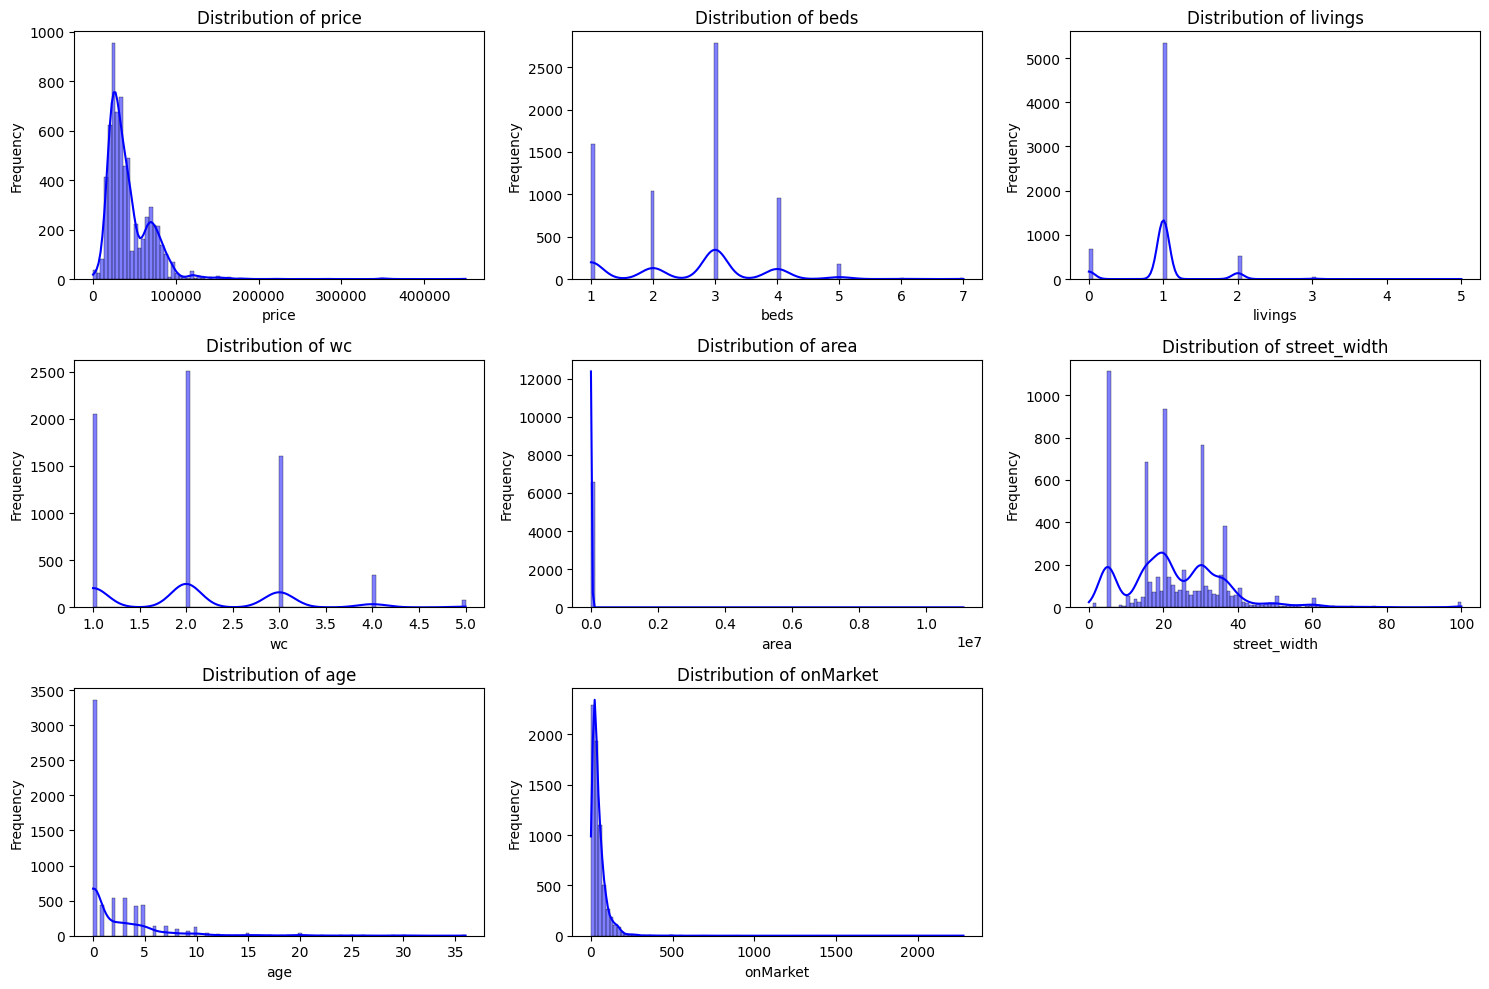

In [118]:
# List of columns to plot
columns_to_plot = ['price', 'beds', 'livings', 'wc', 'area', 'street_width', 'age', 'onMarket']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through the columns and plot histograms
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns, i-th subplot
    sns.histplot(realEstate[column], kde=True, bins=100, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# We consider outliar of Price value is nutural outliar

# We consider outliar of Beds value is nutural outliar

# We consider outliar of Beds value above 2 is outliar

# We consider outliar of wc value is nutural outliar 

# We consider outliar of Stret width value 100 is nutural outliar and 0 is outliar

# We consider outliar of age value is nutural outliar 

# We see the Area later

In [119]:
'''
Outlier Handling Rules
Price:

Outlier: Natural outliers (no specific threshold).

Action: Keep as-is.

Beds:

Outlier: Natural outliers (no specific threshold).

Action: Keep as-is.

WC:

Outlier: Natural outliers (no specific threshold).

Action: Keep as-is.

Street Width:

Outlier:

100 is a natural outlier.

0 is an outlier.

Action:

Keep 100 as-is.

Remove or handle 0 values.

Age:

Outlier: Natural outliers (no specific threshold).

Action: Keep as-is.

OnMarket:

Outlier: Natural outliers (no specific threshold).

Action: Keep as-is.

area:

Outlier: 

1100 is outlier.
Natural outliers (no specific threshold).

Action: Keep as-is.

'''


'\nOutlier Handling Rules\nPrice:\n\nOutlier: Natural outliers (no specific threshold).\n\nAction: Keep as-is.\n\nBeds:\n\nOutlier: Natural outliers (no specific threshold).\n\nAction: Keep as-is.\n\nWC:\n\nOutlier: Natural outliers (no specific threshold).\n\nAction: Keep as-is.\n\nStreet Width:\n\nOutlier:\n\n100 is a natural outlier.\n\n0 is an outlier.\n\nAction:\n\nKeep 100 as-is.\n\nRemove or handle 0 values.\n\nAge:\n\nOutlier: Natural outliers (no specific threshold).\n\nAction: Keep as-is.\n\nOnMarket:\n\nOutlier: Natural outliers (no specific threshold).\n\nAction: Keep as-is.\n\narea:\n\nOutlier: \n\n1100 is outlier.\nNatural outliers (no specific threshold).\n\nAction: Keep as-is.\n\n'

In [120]:
# realEstate['area'].unique()
# realEstate['area'].max() , realEstate['area'].min()

In [121]:
# Calculate the 5th and 95th percentiles
lower_threshold = realEstate['area'].quantile(0.06)
upper_threshold = realEstate['area'].quantile(0.99)
lower_threshold , upper_threshold

(16.0, 700.0)

In [122]:
# Check the rows before apply the filter
print("real Estate Shape:", realEstate.shape)

real Estate Shape: (6587, 16)


In [123]:
# Filtering properties within the specified area range and sorting by area
realEstate = realEstate[(realEstate['area'] >= lower_threshold) & (realEstate['area'] <= upper_threshold) ]

In [124]:
# Apply capping
# realEstate = realEstate['area'].clip(lower= 16.0, upper=700.0)

In [125]:
# Check the rows after apply the filter
print("real Estate Shape:", realEstate.shape)

real Estate Shape: (6135, 16)


## RiyadhVillasAqar

In [126]:
# Apply describe function 
RiyadhVillasAqar.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,46826.0,2.591513e+04,1.499382e+04,0.000000,1.292525e+04,25836.5,38917.75,5.184400e+04
rooms,46826.0,4.687439e+00,1.104970e+00,1.000000,4.000000e+00,5.0,5.00,7.000000e+00
streetWidth,46826.0,1.815842e+01,4.159402e+00,1.000000,1.500000e+01,20.0,20.00,1.000000e+02
propertyAge,46826.0,2.454790e+00,6.496833e+00,0.000000,0.000000e+00,0.0,0.00,3.500000e+01
driverRoom,46826.0,3.558707e-01,4.787814e-01,0.000000,0.000000e+00,0.0,1.00,1.000000e+00
duplex,46826.0,2.976979e-01,4.572508e-01,0.000000,0.000000e+00,0.0,1.00,1.000000e+00
space,46826.0,3.800217e+02,2.814313e+02,50.000000,2.700000e+02,312.0,400.00,1.000000e+04
maidRoom,46826.0,7.678213e-01,4.222269e-01,0.000000,1.000000e+00,1.0,1.00,1.000000e+00
elevator,46826.0,2.357451e-01,4.244681e-01,0.000000,0.000000e+00,0.0,0.00,1.000000e+00
furnihsed,46826.0,7.873831e-02,2.693328e-01,0.000000,0.000000e+00,0.0,0.00,1.000000e+00


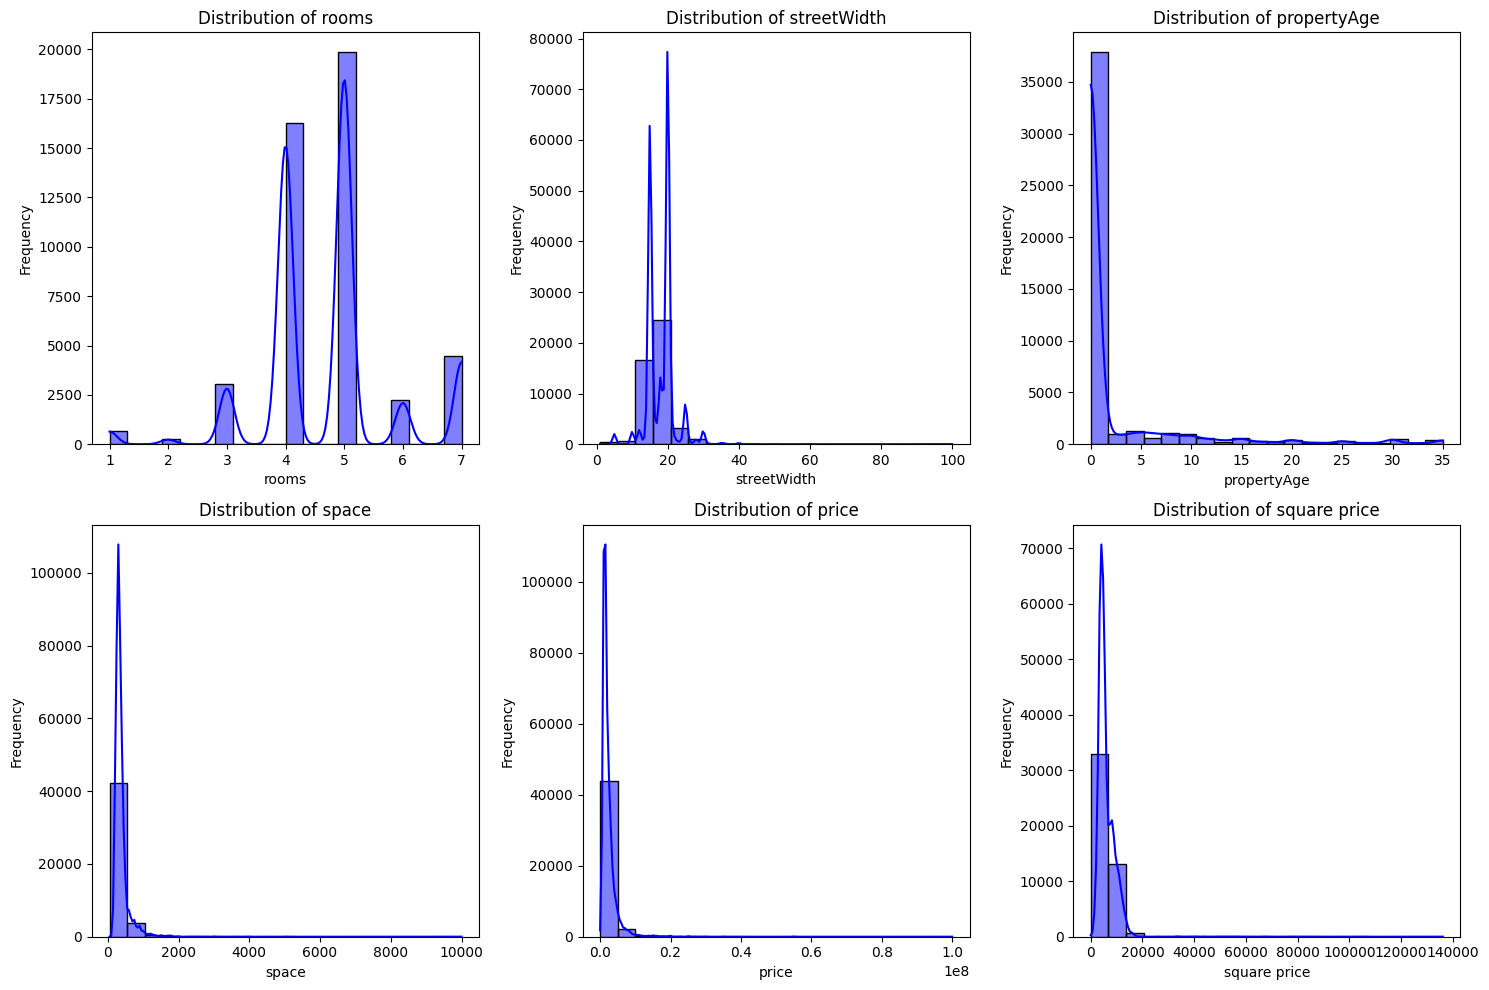

In [127]:
# List of columns to plot
columns_to_plot = ['rooms', 'streetWidth', 'propertyAge', 'space', 'price', 'square price']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through the columns and plot histograms
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, i-th subplot
    sns.histplot(RiyadhVillasAqar[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [128]:
'''
Outlier Handling Rules

Rooms:
Outlier: No outliers.
Action: Keep as-is.

Street Width:
Outlier: Normal (no extreme values).
Action: Keep as-is.

Property Age:
Outlier: Normal (no extreme values).
Action: Keep as-is.

Space:
Outlier: Below 1500 is considered an outlier.
Action: Remove or handle values below 1500.

Price:
Outlier: Below 15,000,000 is considered an outlier.
Action: Remove or handle values below 15,000,000.

Square Price:
Outlier: Values deviating significantly from 10,000.
Action: Normalize around 10,000.

'''
# 'rooms': no outliars 
# 'streetWidth': normal
# 'propertyAge': normal
# 'space': above 1500
# 'price': above 15,000,000
# 'square price': 10000

'\nOutlier Handling Rules\n\nRooms:\nOutlier: No outliers.\nAction: Keep as-is.\n\nStreet Width:\nOutlier: Normal (no extreme values).\nAction: Keep as-is.\n\nProperty Age:\nOutlier: Normal (no extreme values).\nAction: Keep as-is.\n\nSpace:\nOutlier: Below 1500 is considered an outlier.\nAction: Remove or handle values below 1500.\n\nPrice:\nOutlier: Below 15,000,000 is considered an outlier.\nAction: Remove or handle values below 15,000,000.\n\nSquare Price:\nOutlier: Values deviating significantly from 10,000.\nAction: Normalize around 10,000.\n\n'

In [129]:
# Check the row before apply the filter
print("Riyadh Villas Aqar Shape:", RiyadhVillasAqar.shape)

Riyadh Villas Aqar Shape: (46826, 26)


In [130]:
# Filter the dataset 'RiyadhVillasAqar' to remove outliers based on specific thresholds:
# 1. Keep rows where 'space' is less than or equal to 1500 (removes properties with unusually large areas)
# 2. Keep rows where 'price' is less than or equal to 15,000,000 (removes properties with unusually high prices)
# 3. Keep rows where 'square price' is less than or equal to 12,500 (removes properties with unusually high price per square unit)
RiyadhVillasAqar = RiyadhVillasAqar[
    (RiyadhVillasAqar['space'] <= 1500) & 
    (RiyadhVillasAqar['price'] <= 15000000) & 
    (RiyadhVillasAqar['square price'] <= 12500)
]

# Check the shape of the filtered dataset to see how many rows and columns remain after removing outliers
RiyadhVillasAqar.shape

(45102, 26)

In [131]:
# Apply fliter on apartments column to get rid of outliars
values_to_remove = {"10", "12", "15", "11", "14", "30+", "13", "23", "20", "16"}


RiyadhVillasAqar = RiyadhVillasAqar[~RiyadhVillasAqar['apartments'].astype(str).isin(values_to_remove)]

In [132]:
# Display The Result
RiyadhVillasAqar['apartments'].value_counts()

apartments
0    25295
1     9302
2     8345
3     1680
4      390
5       29
6       12
7        7
8        7
9        1
Name: count, dtype: int64

In [133]:
# Apply fliter on lounges column to get rid of outliars
values_to_remove = {"7+"}


RiyadhVillasAqar = RiyadhVillasAqar[~RiyadhVillasAqar['lounges'].astype(str).isin(values_to_remove)]

In [134]:
# Display The Result
RiyadhVillasAqar['lounges'].value_counts()

lounges
2    20210
3    12499
1     7771
4     2650
5     1928
Name: count, dtype: int64

## Riyadh_Aqqar

-------------------

In [135]:
# Apply describe function 
Riyadh_Aqqar.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,2155.0,1.568781e+03,9.757997e+03,1.0,413.0,670.0,900.0,299684.0
Square Price,2155.0,4.356649e+03,3.521481e+04,90.0,1365.0,2570.0,4000.0,945000.0
Price,2155.0,5.050271e+06,3.141799e+07,1400.0,781000.0,1442000.0,3150000.0,893025000.0


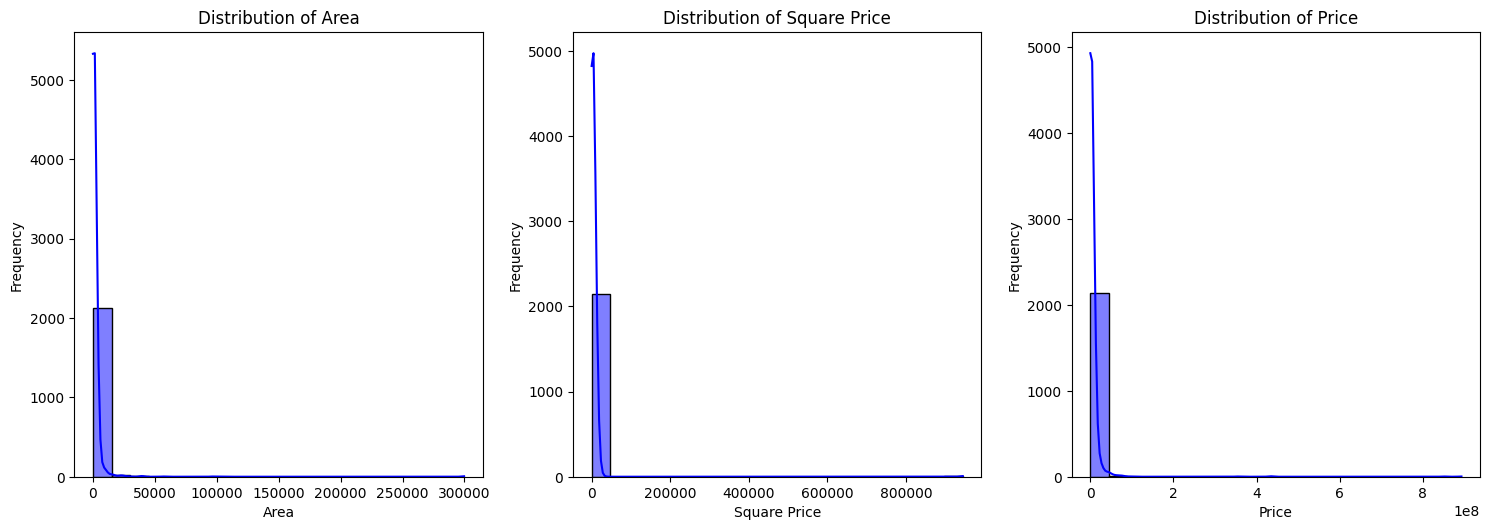

In [136]:
# List of columns to plot
columns_to_plot = ['Area', 'Square Price', 'Price']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through the columns and plot histograms
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, i-th subplot
    sns.histplot(Riyadh_Aqqar[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [137]:
# # Check the row before apply the filter
print("Riyadh Aqar Shape:", Riyadh_Aqqar.shape)

Riyadh Aqar Shape: (2155, 7)


In [138]:
# Filtering properties based on specific criteria
Riyadh_Aqqar = Riyadh_Aqqar[
    (Riyadh_Aqqar['Area'] <= 10000) & 
    (Riyadh_Aqqar['Price'] <= 25000000) & 
    (Riyadh_Aqqar['Square Price'] <= 20000)
]

In [139]:
# # Check the row after apply the filter
print("Riyadh Aqar Shape:", Riyadh_Aqqar.shape)

Riyadh Aqar Shape: (2083, 7)


## Riyadh_Aqqar_Apartments

-------------------

In [140]:
# Apply describe function 
Riyadh_Aqqar_Apartments.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of Rooms,551.0,3.029038e+00,0.755026,1.000000,3.000000,3.000000e+00,3.000000e+00,6.000000e+00
Number of Living Rooms,551.0,1.248639e+00,0.440942,1.000000,1.000000,1.000000e+00,1.000000e+00,3.000000e+00
Area,551.0,1.516334e+02,41.423181,43.000000,126.000000,1.420000e+02,1.690000e+02,4.280000e+02
Floor,551.0,1.081670e+00,3.334482,-1.000000,0.000000,1.000000e+00,1.000000e+00,5.900000e+01
Property Age,551.0,1.382940e+00,2.953642,0.000000,0.000000,0.000000e+00,1.000000e+00,1.300000e+01
Total Price,551.0,1.137539e+06,331582.515731,700000.000000,900000.000000,1.100000e+06,1.270000e+06,3.500000e+06
Square Price,551.0,7.837258e+03,2666.201367,3416.938111,6254.251701,7.425676e+03,8.571429e+03,2.558140e+04


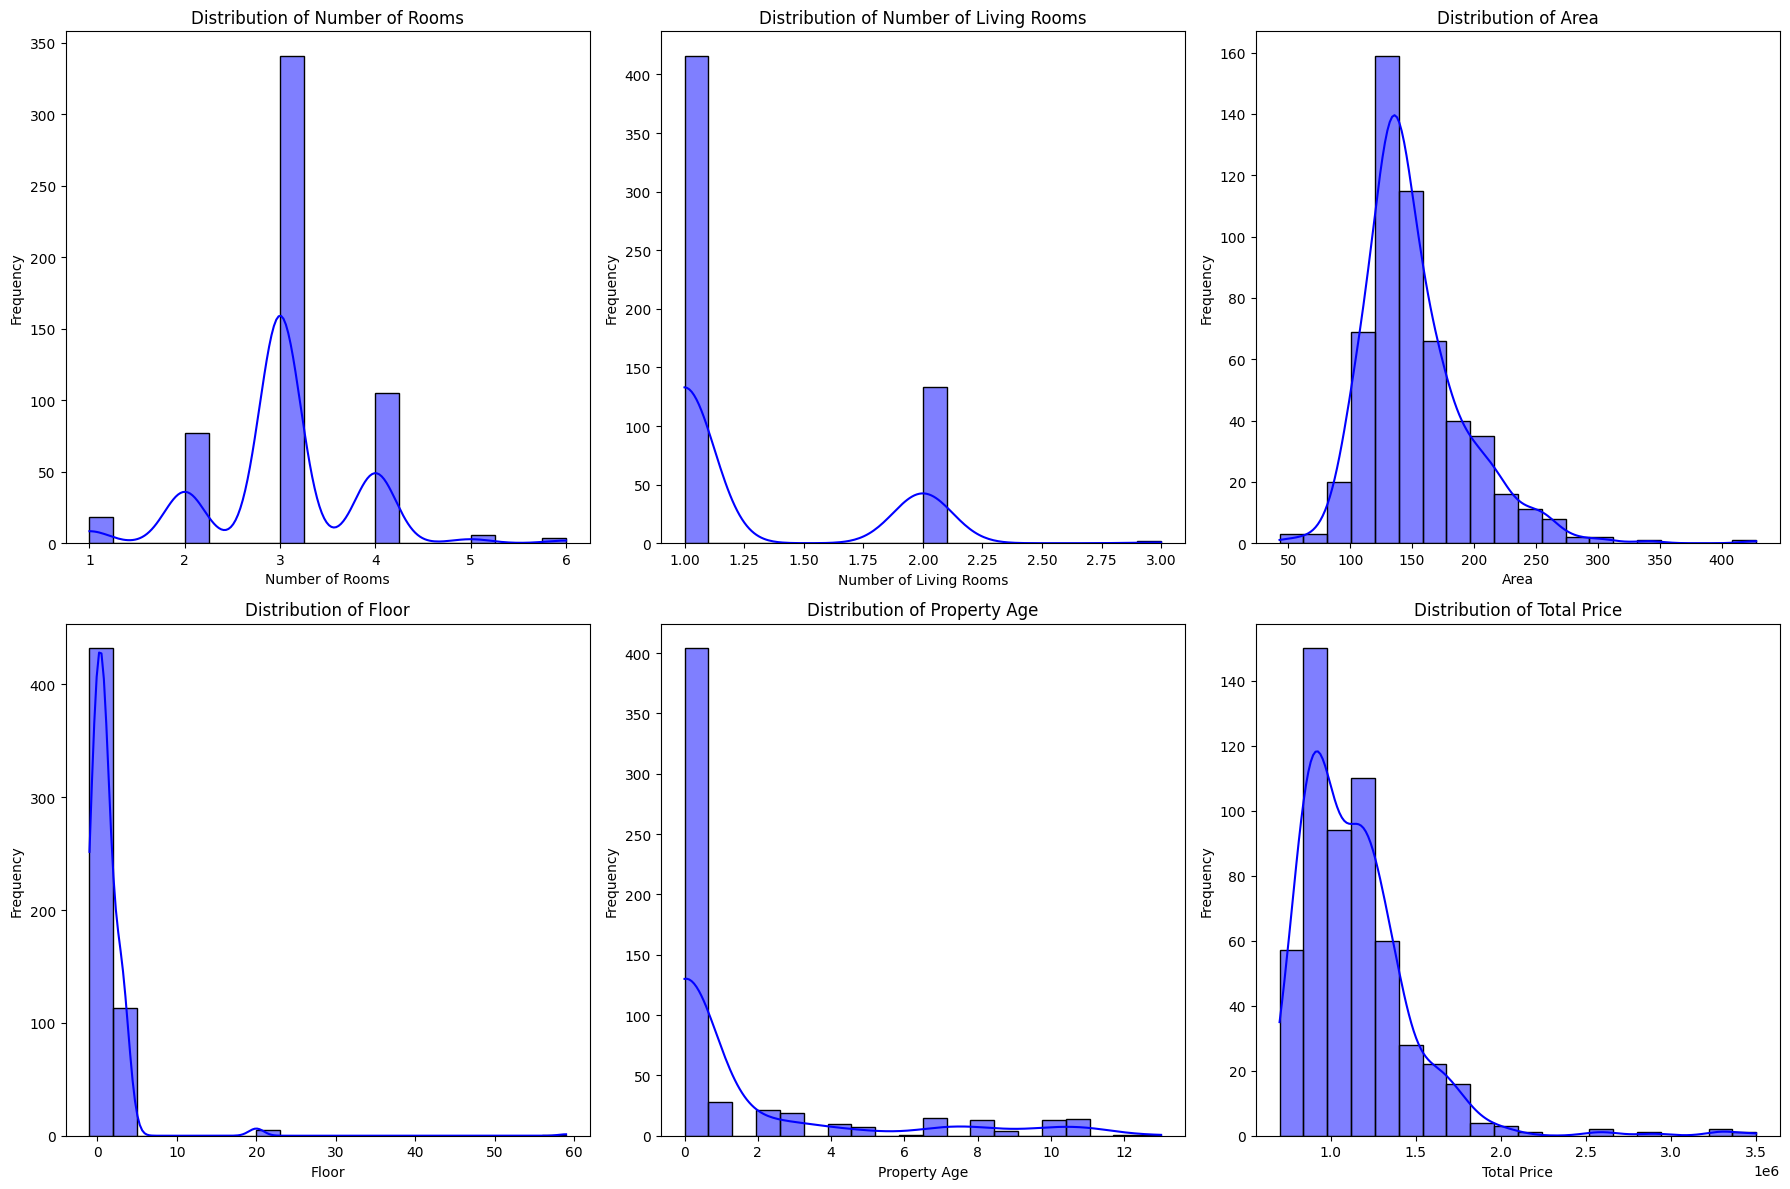

In [141]:
# List of columns to plot
columns_to_plot = [
    'Number of Rooms', 'Number of Living Rooms', 'Area', 
    'Floor', 'Property Age', 'Total Price'
]

# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# Loop through the columns and plot histograms
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, i-th subplot
    sns.histplot(Riyadh_Aqqar_Apartments[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [142]:
# In Riyadh_Aqqar_Apartments Dataset:
# Retaining natural outliers
# Initially, we considered removing extreme values based on predefined thresholds.
# However, these values represent natural variations in the dataset rather than anomalies.
# Removing them would not add value to the analysis, so we retain all data points.

## Riyadh_Aqqar_Villas 

-------------------

In [143]:
# Apply describe function 
Riyadh_Aqqar_Villas.describe().T

,count,mean,std,min,25%,50%,75%,max
Street Width,1090.0,1.595596e+01,3.293967e+00,5.0,15.0,15.0,15.0,40.0
Area,1090.0,4.698877e+02,1.379109e+03,25.0,276.0,350.0,450.0,32020.0
Total Price,1090.0,2.629100e+06,2.092205e+06,300000.0,1500000.0,2150000.0,3000000.0,22500000.0


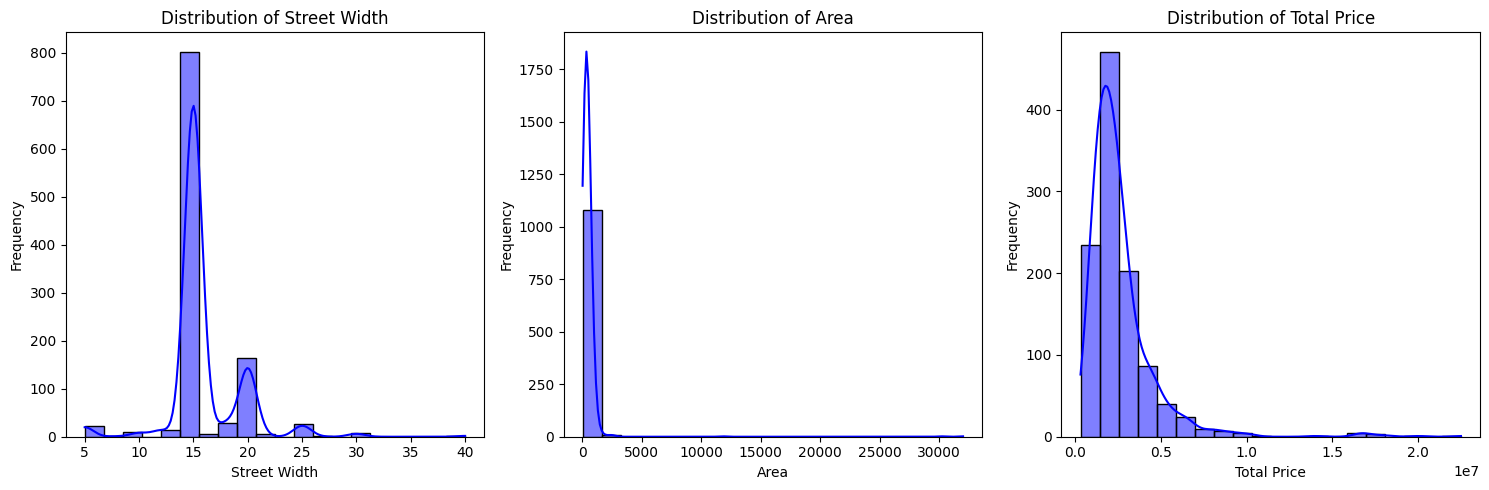

In [144]:
# List of columns to plot
columns_to_plot = ['Street Width', 'Area', 'Total Price']

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Loop through the columns and plot histograms
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, i-th subplot
    sns.histplot(Riyadh_Aqqar_Villas[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [145]:
# View the data for better understand
Riyadh_Aqqar_Villas.sort_values(by='Area', ascending = False)

,Property Type,District,Frontage,Number of Rooms,Number of Living Rooms,Number of Bathrooms,Street Width,Area,Staircase,Kitchen,Maid Room,Driver Room,Annex,Courtyard,Swimming Pool,Basement,Car Entrance,Elevator,Total Price
889,فيلا,حي الشرق,جنوبية,5,4,5+,15.0,32020.000000,True,False,True,True,False,True,False,False,True,False,1530000
1040,فيلا,حي الرمال,شمالية غربية,1,2,5+,15.0,30201.000000,False,True,True,True,True,True,False,False,True,False,1650000
128,فيلا,حي العارض,غربية,3,2,5+,15.0,11811.000000,False,True,True,False,False,False,False,False,False,False,1350000
349,فيلا,حي الحمراء,غربية,7+,2,5+,15.0,2500.000000,True,True,True,True,True,True,False,False,True,False,16700000
122,فيلا,حي الندى,غربية,7+,4,5+,15.0,2500.000000,False,True,False,False,False,False,False,False,True,False,16700000
324,فيلا,حي قرطبة,غربية,7+,4,5+,15.0,2500.000000,True,True,True,True,True,True,False,False,True,False,16700000
63,فيلا,حي النزهة,ثلاث شوارع,7+,4,5+,15.0,2450.000000,True,True,True,True,True,True,True,True,True,False,18000000
248,فيلا,حي النخيل,جنوبية شرقية,7+,2,5+,30.0,1825.000000,True,True,True,True,True,True,True,True,True,False,20000000
41,فيلا,حي الملقا,شرقية,7+,4,5+,15.0,1750.000000,True,False,True,True,True,True,False,False,True,True,22500000
704,فيلا,حي الربوة,شمالية,4,2,4,20.0,1601.000000,True,True,True,True,True,True,True,False,True,False,6564100


In [146]:
# Check the row before apply the filter
print("Riyadh Aqar Villas Shape:", Riyadh_Aqqar_Villas.shape)

Riyadh Aqar Villas Shape: (1090, 19)


In [147]:
# Filtering out properties with an area greater than 30,000
Riyadh_Aqqar_Villas = Riyadh_Aqqar_Villas[
    (Riyadh_Aqqar_Villas['Area'] <= 30000)
]

In [148]:
# Check the row after apply the filter
print("Riyadh Aqar Villas Shape:", Riyadh_Aqqar_Villas.shape)

Riyadh Aqar Villas Shape: (1088, 19)


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

# 1️⃣ How many properties are listed in each Riyadh region?

In [149]:
location_counts = RiyadhVillasAqar['location'].value_counts()


location_counts.to_frame(name="Count")
# for the first question, how many villas in each region

,Count
location,
غرب الرياض,13460
شرق الرياض,12671
شمال الرياض,9790
جنوب الرياض,8923
وسط الرياض,214


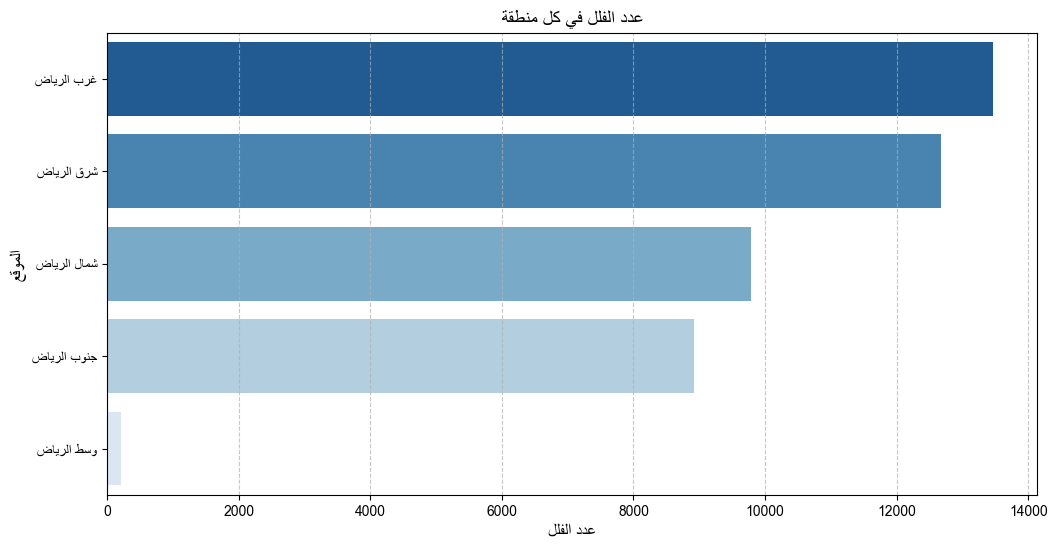

In [150]:
plt.rcParams['font.family'] = 'Arial'

def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]

location_counts = RiyadhVillasAqar['location'].value_counts().head(10)

fixed_labels = fix_arabic_labels(location_counts.index)

plt.figure(figsize=(12, 6))


sns.barplot(x=location_counts.values, y=fixed_labels, palette="Blues_r")
# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("عدد الفلل")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الموقع")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("عدد الفلل في كل منطقة")), fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 2️⃣ What is the avarage price of villas based on Riyadh regions ?

In [151]:
RiyadhVillasAqar.groupby('location')['square price'].mean().sort_values(ascending=False) 

location
شمال الرياض    9221.568155
شرق الرياض     5648.982395
غرب الرياض     4624.489071
وسط الرياض     3654.480505
جنوب الرياض    3390.674650
Name: square price, dtype: float64

c:\Users\sulta\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


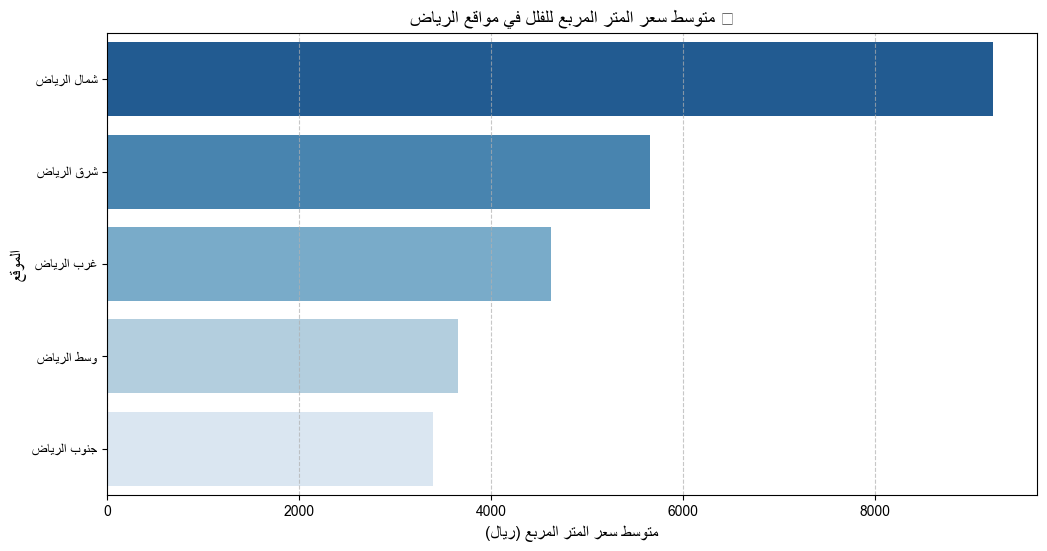

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# Ensure font supports Arabic
plt.rcParams['font.family'] = 'Arial'

# Function to reshape Arabic labels for correct display
def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]

# Group by location and calculate average square price
location_avg_price = RiyadhVillasAqar.groupby('location')['square price'].mean().sort_values(ascending=False).head(10)

# Fix Arabic labels for location names
fixed_labels = fix_arabic_labels(location_avg_price.index)

# Create figure
plt.figure(figsize=(12, 6))

# Bar plot
sns.barplot(x=location_avg_price.values, y=fixed_labels, palette="Blues_r")

# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط سعر المتر المربع (ريال)")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الموقع")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("📊 متوسط سعر المتر المربع للفلل في مواقع الرياض")), fontsize=14)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# 3️⃣ What is the lowest avarage price of villas based on Riyadh north region district ?

In [153]:
FilterNorth = RiyadhVillasAqar[(RiyadhVillasAqar['location'] == 'شمال الرياض')].sort_values(by = 'square price', ascending = False)

FilterNorth1 = FilterNorth.groupby('neighbourhood')['square price'].mean().sort_values()

FilterNorth1

neighbourhood
بنبان                      2000.000000
الخير                      3173.269428
الملك عبدالعزيز            4149.377593
عقرباء                     4850.000000
المصيف                     4917.242310
الرمال                     5136.752136
السليمانية                 5664.346930
مطار الملك خالد الدولي     5735.121770
الملك فهد                  5764.813337
صلاح الدين                 5979.511755
الورود                     6558.901621
العليا                     6673.500353
المرسلات                   6835.867665
المغرزات                   7141.330645
النفل                      7316.822689
الواحة                     7489.760474
غير محدد                   7627.231047
المروج                     7652.364849
النزهة                     7735.629439
الرحمانية                  7766.375206
الفلاح                     7858.062086
العقيق                     8131.523922
التعاون                    8270.466959
الكتاني                    8648.677249
المعذر الشمالي             8651.521723
الغدير     

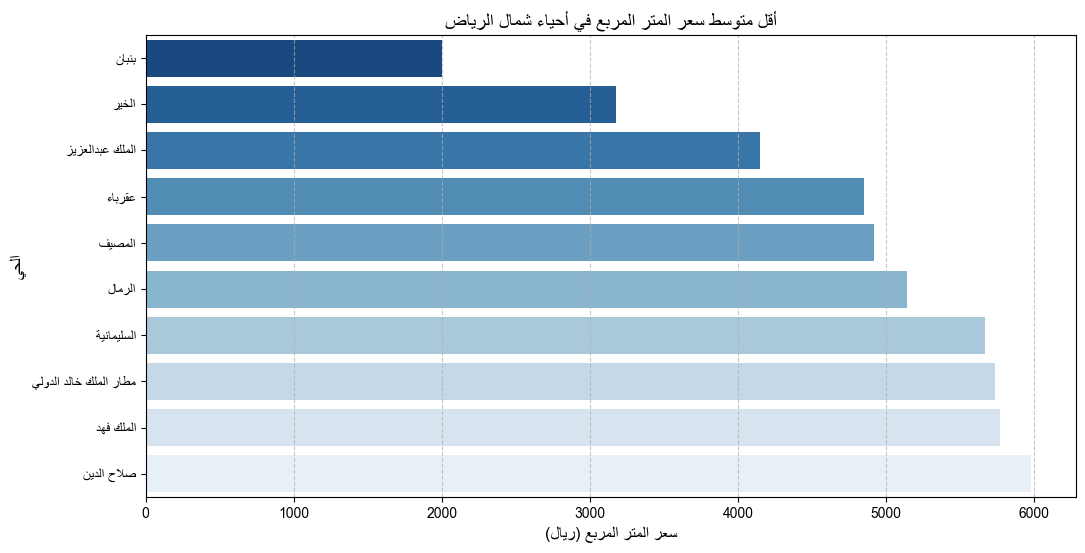

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# Ensure font supports Arabic
plt.rcParams['font.family'] = 'Arial'

# Function to reshape Arabic labels for correct display
def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]

# Filter data for 'شمال الرياض' location and sort by square price
FilterNorth = RiyadhVillasAqar[(RiyadhVillasAqar['location'] == 'شمال الرياض')].sort_values(by='square price')

# Group by neighbourhood and calculate the average square price
FilterNorth1 = FilterNorth.groupby('neighbourhood')['square price'].mean().sort_values().head(10)

# Fix Arabic labels for neighbourhood names
fixed_labels = fix_arabic_labels(FilterNorth1.index)

# Create figure
plt.figure(figsize=(12, 6))

# Barplot
sns.barplot(x=FilterNorth1.values, y=fixed_labels, palette="Blues_r")

# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("سعر المتر المربع (ريال)")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("أقل متوسط سعر المتر المربع في أحياء شمال الرياض")), fontsize=14)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# 4️⃣ Which districts in Riyadh have the highest number of properties, and what are the most common purposes of it highest district?

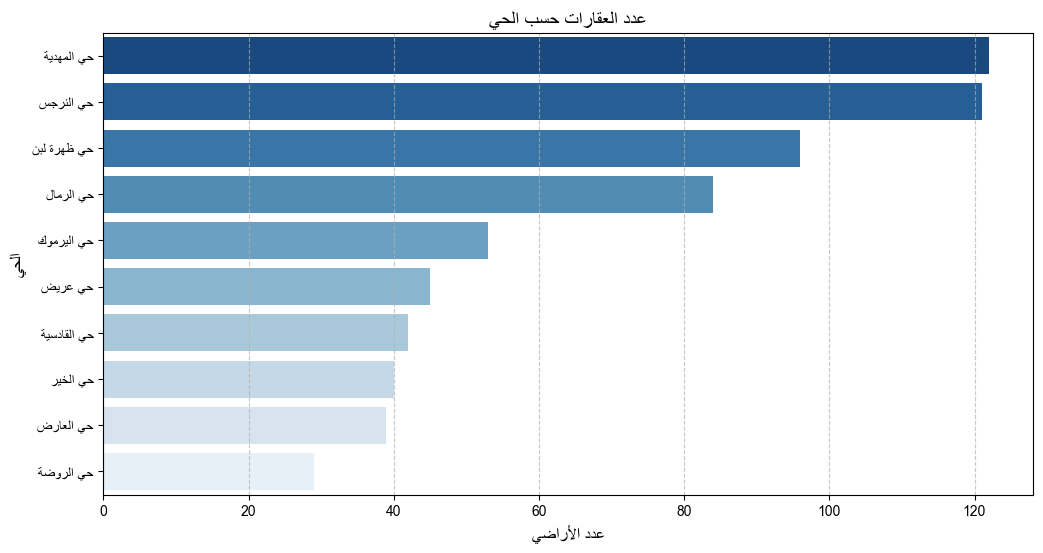

In [155]:
plt.rcParams['font.family'] = 'Arial'


def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]


district_counts = Riyadh_Aqqar[Riyadh_Aqqar['District'] != 'غير محدد'].groupby('District').size().sort_values(ascending=False).head(10)


fixed_labels = fix_arabic_labels(district_counts.index)


plt.figure(figsize=(12, 6))

sns.barplot(x=district_counts.values, y=fixed_labels, palette="Blues_r")

# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("عدد الأراضي")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("عدد العقارات حسب الحي")), fontsize=14)


plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

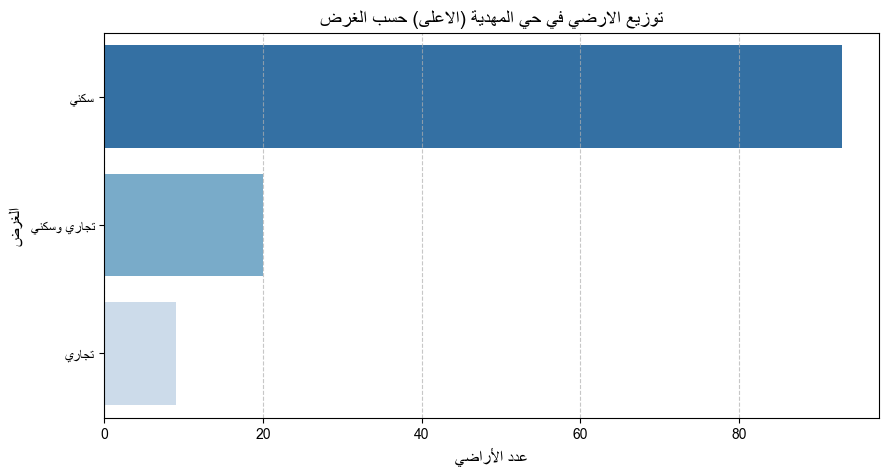

In [156]:
plt.rcParams['font.family'] = 'Arial'

def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]


highest_district_data = Riyadh_Aqqar[Riyadh_Aqqar['District'] == 'حي المهدية']


purpose_counts = highest_district_data['Purpose'].value_counts()


fixed_labels = fix_arabic_labels(purpose_counts.index)


plt.figure(figsize=(10, 5))


sns.barplot(x=purpose_counts.values, y=fixed_labels, palette="Blues_r")

# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("عدد الأراضي")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الغرض")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("توزيع الارضي في حي المهدية (الاعلى) حسب الغرض")), fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 5️⃣ What is the best district for investment opportunities based on demand?

In [157]:
# Format float values to display with two decimal places and thousands separator
pd.options.display.float_format = '{:,.2f}'.format  

# Group by District and calculate the average Total Price, then sort the values
Riyadh_Aqqar_Apartments.groupby('District')['Total Price'].mean().sort_values()



District
حي العقيق                     820,000.00
حي المصيف                     957,833.33
حي الوادي                     965,285.71
حي العارض                   1,003,527.77
حي النرجس                   1,018,184.33
حي الملك فهد                1,040,000.00
حي الياسمين                 1,068,645.16
حي المروج                   1,071,909.09
حي الفلاح                   1,111,333.33
حي الندى                    1,149,333.33
غير محدد                    1,160,016.67
حي النفل                    1,181,111.11
حي القيروان                 1,215,348.83
حي التعاون                  1,220,000.00
حي الملقا                   1,226,169.27
حي المغرزات                 1,263,857.14
حي حطين                     1,270,388.89
                            1,315,000.00
شارع عبدالله بن العاص       1,350,000.00
حي النزهة                   1,357,500.00
حي الربيع                   1,388,428.57
حي المرسلات                 1,400,000.00
حي النخيل                   1,660,000.00
حي الصحافة                  1,719,875.00
حي العل

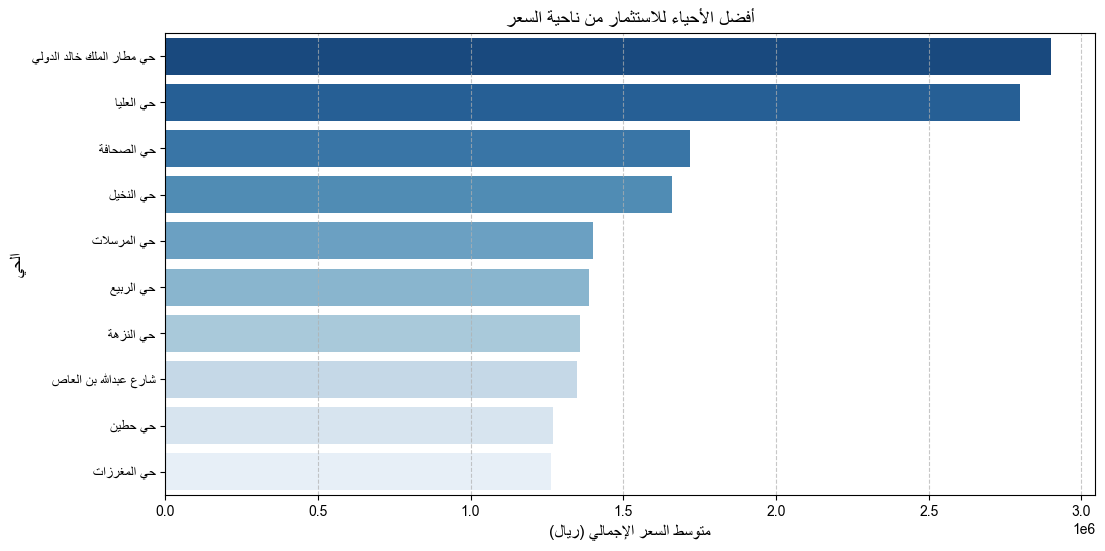

In [158]:
# Ensure font supports Arabic
plt.rcParams['font.family'] = 'Arial'

# Function to reshape Arabic labels for correct display
def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]

# Filter out empty district names
filtered_data = Riyadh_Aqqar_Apartments[Riyadh_Aqqar_Apartments['District'] != '']

# Group by District and calculate the average Total Price
district_avg_price = filtered_data.groupby('District')['Total Price'].mean().sort_values(ascending=False).head(10)

# Fix Arabic labels for district names
fixed_labels = fix_arabic_labels(district_avg_price.index)

# Create a figure
plt.figure(figsize=(12, 6))

# Bar plot
sns.barplot(x=district_avg_price.values, y=fixed_labels, palette="Blues_r")

# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر الإجمالي (ريال)")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("أفضل الأحياء للاستثمار من ناحية السعر")), fontsize=14)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

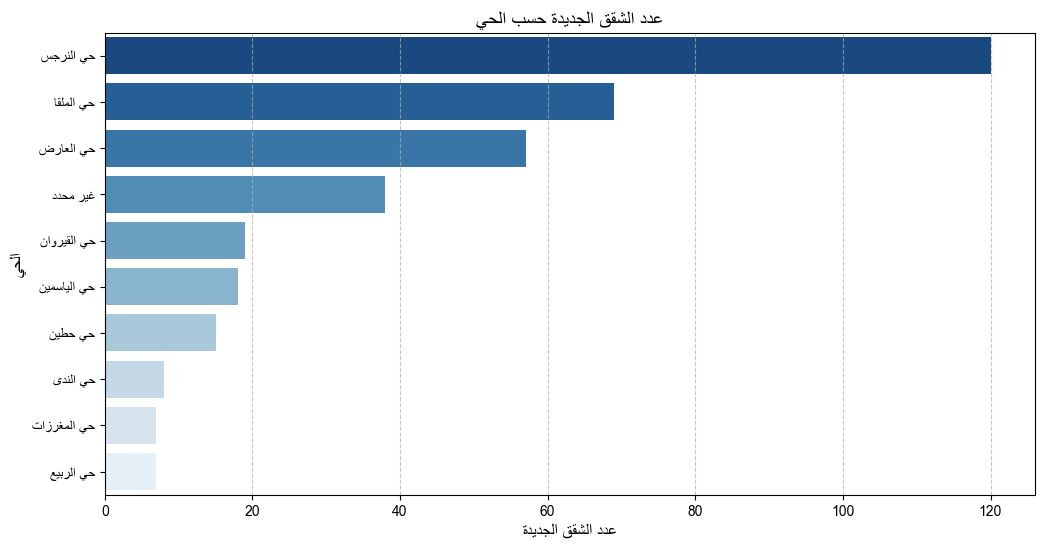

In [159]:
plt.rcParams['font.family'] = 'Arial'


def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]


new_apartments = Riyadh_Aqqar_Apartments[Riyadh_Aqqar_Apartments['Property Age'] == 0]
new_apartments_count = new_apartments.groupby('District').size().sort_values(ascending=False).head(10)


fixed_labels = fix_arabic_labels(new_apartments_count.index)


plt.figure(figsize=(12, 6))


sns.barplot(x=new_apartments_count.values, y=fixed_labels, palette="Blues_r")

# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("عدد الشقق الجديدة")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("عدد الشقق الجديدة حسب الحي")), fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 6️⃣ How can the districts be categorized based on the availability of furnished or unfurnished apartments?

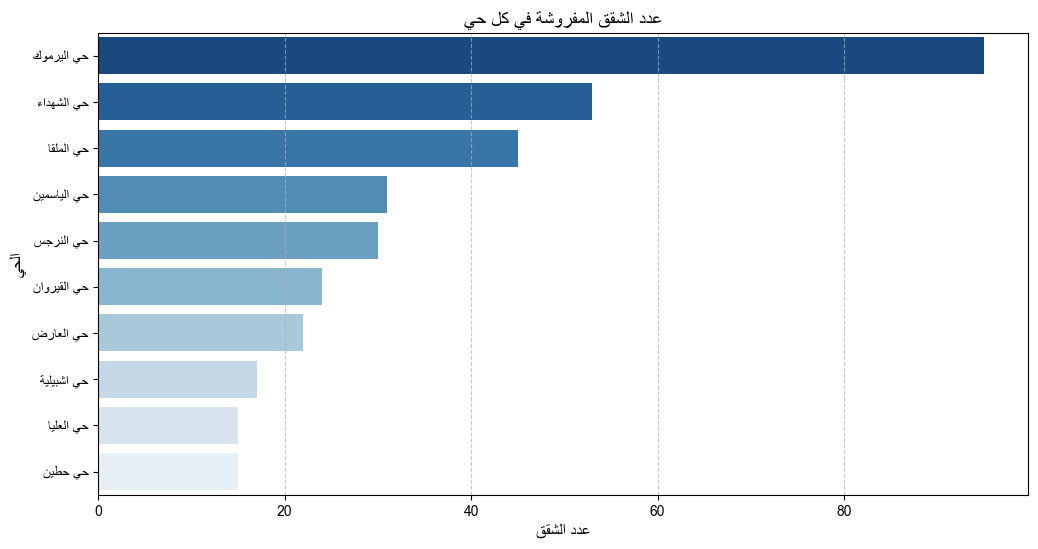

In [160]:
plt.rcParams['font.family'] = 'Arial'

def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]

furnished_apartments = realEstate[
    (realEstate['furnished'] == True) & (realEstate['district'] != 'غير محدد')
]

furnished_apartments_count = furnished_apartments.groupby('district').size().sort_values(ascending=False).head(10)

fixed_labels = fix_arabic_labels(furnished_apartments_count.index)

plt.figure(figsize=(12, 6))

sns.barplot(x=furnished_apartments_count.values, y=fixed_labels, palette="Blues_r")

# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("عدد الشقق")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("عدد الشقق المفروشة في كل حي")), fontsize=14)


plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

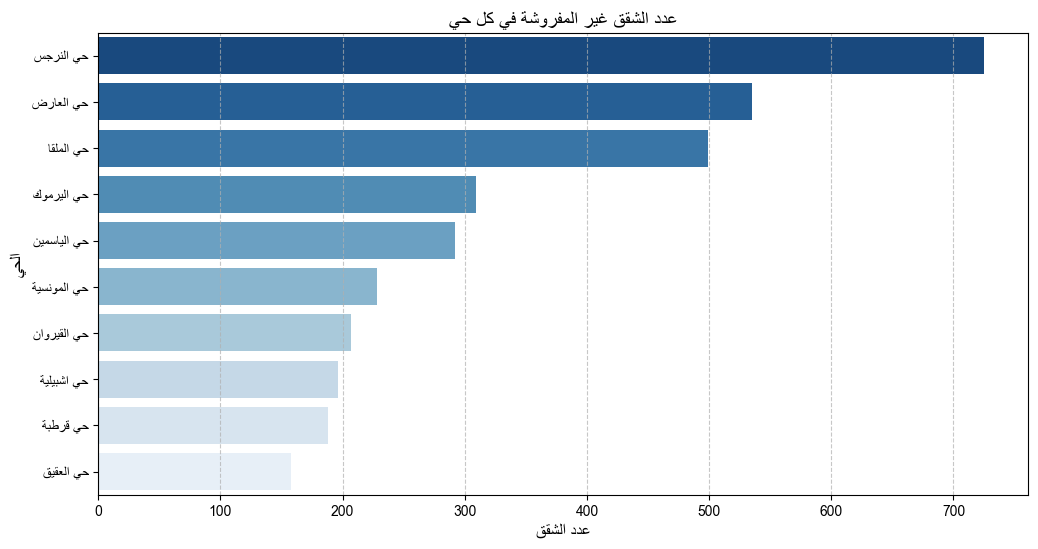

In [161]:
plt.rcParams['font.family'] = 'Arial'

def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]

furnished_apartments = realEstate[
    (realEstate['furnished'] == False) & (realEstate['district'] != 'غير محدد')
]

furnished_apartments_count = furnished_apartments.groupby('district').size().sort_values(ascending=False).head(10)

fixed_labels = fix_arabic_labels(furnished_apartments_count.index)

plt.figure(figsize=(12, 6))

sns.barplot(x=furnished_apartments_count.values, y=fixed_labels, palette="Blues_r")

# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("عدد الشقق")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("عدد الشقق غير المفروشة في كل حي")), fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()